In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import portfolio_metrics as pm
from statistics import mean, median

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df_fac_rets = pd.read_csv('Factor_Returns.csv')
df_fac_rets.dropna(inplace=True)
df_fac_rets = df_fac_rets.reset_index(drop=True)
df_fac_rets

,Date,RF,MKT,S,B,SMB,H,L,HML,H_S,...,U,D,UMD,U_S,D_S,U_B,D_B,UMD_S,UMD_B,UMD_SMB
0,1968-07-31,0.0048,-0.022024,-0.038164,-0.017192,-0.020973,0.007493,-0.059025,0.066518,0.006490,...,-0.040669,-0.032566,-0.008103,-0.035863,-0.044799,-0.045474,-0.020333,0.008935,-0.025141,0.034076
1,1968-08-31,0.0042,0.018037,0.040424,0.016679,0.023745,0.035886,0.021181,0.014704,0.049678,...,0.031045,0.019486,0.011559,0.050926,0.025771,0.011163,0.013200,0.025155,-0.002037,0.027193
2,1968-09-30,0.0043,0.044454,0.069731,0.043225,0.026506,0.055910,0.052097,0.003813,0.061571,...,0.052374,0.062997,-0.010623,0.077795,0.067410,0.026953,0.058585,0.010385,-0.031632,0.042017
3,1968-10-31,0.0044,0.009041,0.009533,0.004370,0.005163,0.027136,-0.012722,0.039857,0.022086,...,0.006242,0.005645,0.000597,0.001835,0.004865,0.010650,0.006425,-0.003030,0.004225,-0.007255
4,1968-11-30,0.0042,0.058501,0.076939,0.059936,0.017003,0.061075,0.080104,-0.019029,0.069928,...,0.081805,0.078824,0.002981,0.078969,0.076671,0.084640,0.080977,0.002298,0.003663,-0.001366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2020-02-29,0.0012,-0.077918,-0.090227,-0.084726,-0.005502,-0.110770,-0.066237,-0.044533,-0.106680,...,-0.076906,-0.083712,0.006806,-0.073580,-0.091243,-0.080232,-0.076181,0.017663,-0.004052,0.021715
619,2020-03-31,0.0013,-0.141733,-0.245046,-0.143991,-0.101054,-0.280640,-0.150905,-0.129734,-0.303208,...,-0.160610,-0.264557,0.103947,-0.212485,-0.273400,-0.108735,-0.255713,0.060915,0.146978,-0.086063
620,2020-04-30,0.0000,0.129677,0.203709,0.149739,0.053970,0.206505,0.182265,0.024240,0.239935,...,0.151843,0.239887,-0.088044,0.177960,0.274160,0.125726,0.205615,-0.096200,-0.079888,-0.016311
621,2020-05-31,0.0001,0.053739,0.066052,0.053502,0.012551,0.038991,0.087354,-0.048363,0.042365,...,0.066546,0.062111,0.004435,0.078378,0.092792,0.054714,0.031430,-0.014414,0.023284,-0.037698


In [3]:
df_fac_rets['Date'] = pd.to_datetime(df_fac_rets['Date'])
df_fac_rets

,Date,RF,MKT,S,B,SMB,H,L,HML,H_S,...,U,D,UMD,U_S,D_S,U_B,D_B,UMD_S,UMD_B,UMD_SMB
0,1968-07-31,0.0048,-0.022024,-0.038164,-0.017192,-0.020973,0.007493,-0.059025,0.066518,0.006490,...,-0.040669,-0.032566,-0.008103,-0.035863,-0.044799,-0.045474,-0.020333,0.008935,-0.025141,0.034076
1,1968-08-31,0.0042,0.018037,0.040424,0.016679,0.023745,0.035886,0.021181,0.014704,0.049678,...,0.031045,0.019486,0.011559,0.050926,0.025771,0.011163,0.013200,0.025155,-0.002037,0.027193
2,1968-09-30,0.0043,0.044454,0.069731,0.043225,0.026506,0.055910,0.052097,0.003813,0.061571,...,0.052374,0.062997,-0.010623,0.077795,0.067410,0.026953,0.058585,0.010385,-0.031632,0.042017
3,1968-10-31,0.0044,0.009041,0.009533,0.004370,0.005163,0.027136,-0.012722,0.039857,0.022086,...,0.006242,0.005645,0.000597,0.001835,0.004865,0.010650,0.006425,-0.003030,0.004225,-0.007255
4,1968-11-30,0.0042,0.058501,0.076939,0.059936,0.017003,0.061075,0.080104,-0.019029,0.069928,...,0.081805,0.078824,0.002981,0.078969,0.076671,0.084640,0.080977,0.002298,0.003663,-0.001366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2020-02-29,0.0012,-0.077918,-0.090227,-0.084726,-0.005502,-0.110770,-0.066237,-0.044533,-0.106680,...,-0.076906,-0.083712,0.006806,-0.073580,-0.091243,-0.080232,-0.076181,0.017663,-0.004052,0.021715
619,2020-03-31,0.0013,-0.141733,-0.245046,-0.143991,-0.101054,-0.280640,-0.150905,-0.129734,-0.303208,...,-0.160610,-0.264557,0.103947,-0.212485,-0.273400,-0.108735,-0.255713,0.060915,0.146978,-0.086063
620,2020-04-30,0.0000,0.129677,0.203709,0.149739,0.053970,0.206505,0.182265,0.024240,0.239935,...,0.151843,0.239887,-0.088044,0.177960,0.274160,0.125726,0.205615,-0.096200,-0.079888,-0.016311
621,2020-05-31,0.0001,0.053739,0.066052,0.053502,0.012551,0.038991,0.087354,-0.048363,0.042365,...,0.066546,0.062111,0.004435,0.078378,0.092792,0.054714,0.031430,-0.014414,0.023284,-0.037698


In [4]:
df_fac_rets['MKT_RF'] = df_fac_rets['MKT'] - df_fac_rets['RF']
df_fac_rets

,Date,RF,MKT,S,B,SMB,H,L,HML,H_S,...,D,UMD,U_S,D_S,U_B,D_B,UMD_S,UMD_B,UMD_SMB,MKT_RF
0,1968-07-31,0.0048,-0.022024,-0.038164,-0.017192,-0.020973,0.007493,-0.059025,0.066518,0.006490,...,-0.032566,-0.008103,-0.035863,-0.044799,-0.045474,-0.020333,0.008935,-0.025141,0.034076,-0.026824
1,1968-08-31,0.0042,0.018037,0.040424,0.016679,0.023745,0.035886,0.021181,0.014704,0.049678,...,0.019486,0.011559,0.050926,0.025771,0.011163,0.013200,0.025155,-0.002037,0.027193,0.013837
2,1968-09-30,0.0043,0.044454,0.069731,0.043225,0.026506,0.055910,0.052097,0.003813,0.061571,...,0.062997,-0.010623,0.077795,0.067410,0.026953,0.058585,0.010385,-0.031632,0.042017,0.040154
3,1968-10-31,0.0044,0.009041,0.009533,0.004370,0.005163,0.027136,-0.012722,0.039857,0.022086,...,0.005645,0.000597,0.001835,0.004865,0.010650,0.006425,-0.003030,0.004225,-0.007255,0.004641
4,1968-11-30,0.0042,0.058501,0.076939,0.059936,0.017003,0.061075,0.080104,-0.019029,0.069928,...,0.078824,0.002981,0.078969,0.076671,0.084640,0.080977,0.002298,0.003663,-0.001366,0.054301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2020-02-29,0.0012,-0.077918,-0.090227,-0.084726,-0.005502,-0.110770,-0.066237,-0.044533,-0.106680,...,-0.083712,0.006806,-0.073580,-0.091243,-0.080232,-0.076181,0.017663,-0.004052,0.021715,-0.079118
619,2020-03-31,0.0013,-0.141733,-0.245046,-0.143991,-0.101054,-0.280640,-0.150905,-0.129734,-0.303208,...,-0.264557,0.103947,-0.212485,-0.273400,-0.108735,-0.255713,0.060915,0.146978,-0.086063,-0.143033
620,2020-04-30,0.0000,0.129677,0.203709,0.149739,0.053970,0.206505,0.182265,0.024240,0.239935,...,0.239887,-0.088044,0.177960,0.274160,0.125726,0.205615,-0.096200,-0.079888,-0.016311,0.129677
621,2020-05-31,0.0001,0.053739,0.066052,0.053502,0.012551,0.038991,0.087354,-0.048363,0.042365,...,0.062111,0.004435,0.078378,0.092792,0.054714,0.031430,-0.014414,0.023284,-0.037698,0.053639


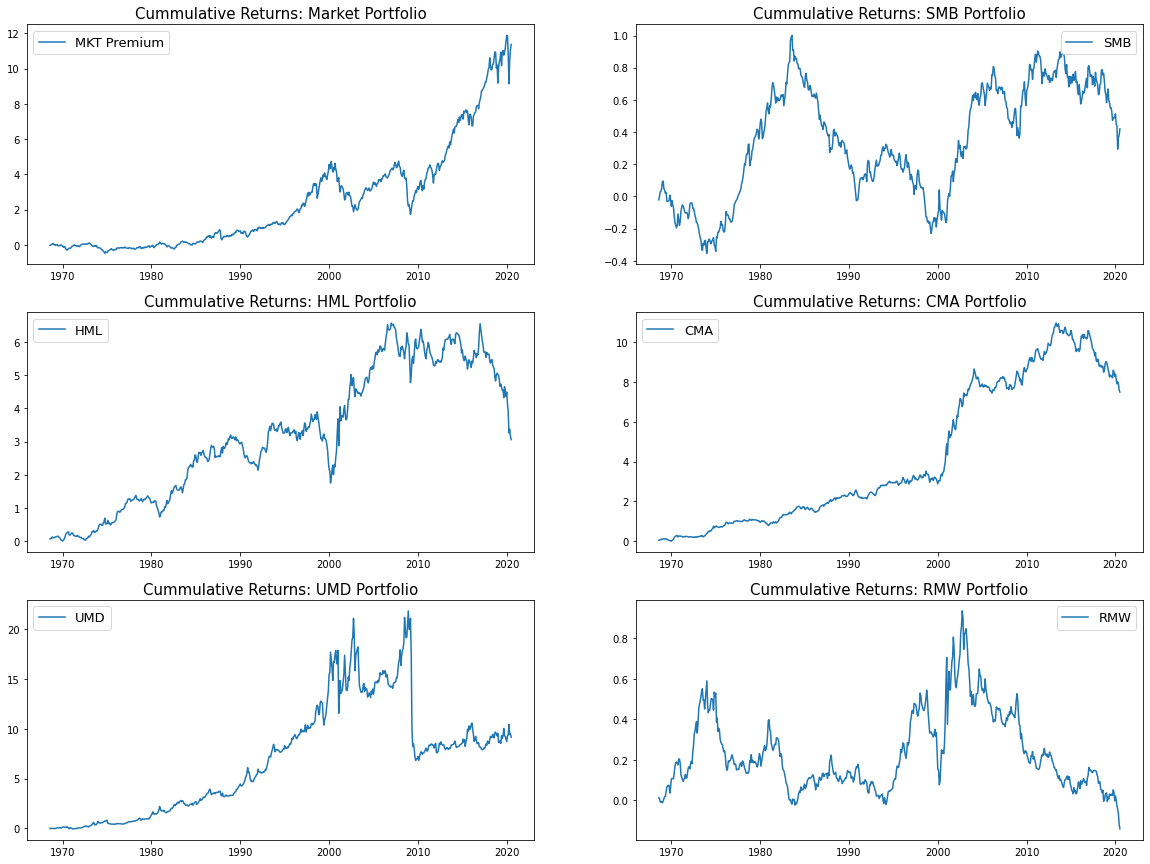

In [5]:
fig = plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.plot(df_fac_rets[df_fac_rets['Date']>'1962-12-31']['Date'],
         (1 + df_fac_rets[df_fac_rets['Date']>'1962-12-31']['MKT_RF']).cumprod() - 1, label='MKT Premium')
plt.legend(loc='upper left', fontsize=13)
plt.title('Cummulative Returns: Market Portfolio', fontsize=15)
plt.subplot(3,2,2)
plt.plot(df_fac_rets[df_fac_rets['Date']>'1962-12-31']['Date'],
         (1 + df_fac_rets[df_fac_rets['Date']>'1962-12-31']['SMB']).cumprod() - 1, label='SMB')
plt.legend(loc='upper right', fontsize=13)
plt.title('Cummulative Returns: SMB Portfolio', fontsize=15)
plt.subplot(3,2,3)
plt.plot(df_fac_rets[df_fac_rets['Date']>'1962-12-31']['Date'],
         (1 + df_fac_rets[df_fac_rets['Date']>'1962-12-31']['HML']).cumprod() - 1, label='HML')
plt.legend(loc='upper left', fontsize=13)
plt.title('Cummulative Returns: HML Portfolio', fontsize=15)
plt.subplot(3,2,4)
plt.plot(df_fac_rets[df_fac_rets['Date']>'1962-12-31']['Date'],
         (1 + df_fac_rets[df_fac_rets['Date']>'1962-12-31']['CMA']).cumprod() - 1, label='CMA')
plt.legend(loc='upper left', fontsize=13)
plt.title('Cummulative Returns: CMA Portfolio', fontsize=15)
plt.subplot(3,2,5)
plt.plot(df_fac_rets[df_fac_rets['Date']>'1962-12-31']['Date'],
         (1 + df_fac_rets[df_fac_rets['Date']>'1962-12-31']['UMD']).cumprod() - 1, label='UMD')
plt.legend(loc='upper left', fontsize=13)
plt.title('Cummulative Returns: UMD Portfolio', fontsize=15)
plt.subplot(3,2,6)
plt.plot(df_fac_rets[df_fac_rets['Date']>'1962-12-31']['Date'],
         (1 + df_fac_rets[df_fac_rets['Date']>'1962-12-31']['RMW_A']).cumprod() - 1, label='RMW')
plt.title('Cummulative Returns: RMW Portfolio', fontsize=15)
plt.legend(loc='upper right', fontsize=13)
plt.show()

#### Table 2
- Spanning Regressions

In [6]:
#CAPM - SMB
model_SMB = smf.ols(formula='SMB ~ MKT_RF', data= df_fac_rets).fit()
model_SMB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SMB   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     72.48
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.27e-16
Time:                        14:25:55   Log-Likelihood:                 1321.0
No. Observations:                 623   AIC:                            -2638.
Df Residuals:                     621   BIC:                            -2629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.354e-05      0.001     -0.071      0.943      -0.002       0.002
MKT_RF         0.2185      0.026      8.513      0.000       0.168       0.269
==============================================================================
Omnibus:                       60.047   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.330
Skew:                           0.493   Prob(JB):                     6.86e-35
Kurtosis:                       5.256   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#CAPM - HML
model_HML = smf.ols(formula='HML ~ MKT_RF', data= df_fac_rets).fit()
model_HML.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HML   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     49.65
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           4.90e-12
Time:                        14:25:55   Log-Likelihood:                 1286.9
No. Observations:                 623   AIC:                            -2570.
Df Residuals:                     621   BIC:                            -2561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0037      0.001      3.015      0.003       0.001       0.006
MKT_RF        -0.1910      0.027     -7.046      0.000      -0.244      -0.138
==============================================================================
Omnibus:                       72.704   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              538.468
Skew:                          -0.139   Prob(JB):                    1.18e-117
Kurtosis:                       7.546   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#3 Factor - Operating Profitability
model_RMWO = smf.ols(formula='RMW_A ~ MKT_RF + SMB + HML', data= df_fac_rets).fit()
model_RMWO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RMW_A   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     113.6
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           1.27e-58
Time:                        14:25:55   Log-Likelihood:                 1561.7
No. Observations:                 623   AIC:                            -3115.
Df Residuals:                     619   BIC:                            -3098.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.001      0.328      0.743      -0.001       0.002
MKT_RF        -0.0790      0.019     -4.114      0.000      -0.117      -0.041
SMB           -0.3529      0.027    -12.898      0.000      -0.407      -0.299
HML            0.2032      0.026      7.846      0.000       0.152       0.254
==============================================================================
Omnibus:                       48.673   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.133
Skew:                           0.160   Prob(JB):                     1.05e-45
Kurtosis:                       5.807   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#3 Factor - Cash Profitability
model_RMWC = smf.ols(formula='RMW_C ~ MKT_RF + SMB + HML', data= df_fac_rets).fit()
model_RMWC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RMW_C   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     11.52
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.34e-07
Time:                        14:25:55   Log-Likelihood:                 1409.3
No. Observations:                 623   AIC:                            -2811.
Df Residuals:                     619   BIC:                            -2793.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0014      0.001     -1.360      0.174      -0.003       0.001
MKT_RF         0.0570      0.025      2.322      0.021       0.009       0.105
SMB           -0.0708      0.035     -2.026      0.043      -0.139      -0.002
HML            0.1862      0.033      5.626      0.000       0.121       0.251
==============================================================================
Omnibus:                      317.479   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6970.839
Skew:                          -1.757   Prob(JB):                         0.00
Kurtosis:                      19.006   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#3 Factor - CMA
model_CMA = smf.ols(formula='CMA ~ MKT_RF + SMB + HML', data= df_fac_rets).fit()
model_CMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CMA   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     270.3
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          4.33e-112
Time:                        14:25:55   Log-Likelihood:                 1766.1
No. Observations:                 623   AIC:                            -3524.
Df Residuals:                     619   BIC:                            -3507.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0029      0.001      4.987      0.000       0.002       0.004
MKT_RF        -0.0940      0.014     -6.795      0.000      -0.121      -0.067
SMB           -0.0006      0.020     -0.031      0.975      -0.039       0.038
HML            0.4573      0.019     24.508      0.000       0.421       0.494
==============================================================================
Omnibus:                       76.997   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.027
Skew:                           0.495   Prob(JB):                     2.14e-67
Kurtosis:                       6.293   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#5 Factor - Momentum (Operating Profitability on RHS)
model_UMD_O = smf.ols(formula='UMD ~ MKT_RF + SMB + HML + RMW_A + CMA', data= df_fac_rets).fit()
model_UMD_O.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UMD   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     23.89
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           5.40e-22
Time:                        14:25:55   Log-Likelihood:                 1095.7
No. Observations:                 623   AIC:                            -2179.
Df Residuals:                     617   BIC:                            -2153.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0050      0.002      2.890      0.004       0.002       0.008
MKT_RF        -0.0976      0.043     -2.278      0.023      -0.182      -0.013
SMB           -0.1473      0.065     -2.256      0.024      -0.275      -0.019
HML           -0.4846      0.080     -6.055      0.000      -0.642      -0.327
RMW_A          0.4719      0.085      5.527      0.000       0.304       0.640
CMA            0.4896      0.119      4.131      0.000       0.257       0.722
==============================================================================
Omnibus:                      246.896   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2393.697
Skew:                          -1.481   Prob(JB):                         0.00
Kurtosis:                      12.134   Cond. No.                         80.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#5 Factor - Momentum (Cash Profitability on RHS)
model_UMD_C = smf.ols(formula='UMD ~ MKT_RF + SMB + HML + RMW_C + CMA', data= df_fac_rets).fit()
model_UMD_C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UMD   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     18.78
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           2.11e-17
Time:                        14:25:55   Log-Likelihood:                 1084.7
No. Observations:                 623   AIC:                            -2157.
Df Residuals:                     617   BIC:                            -2131.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0050      0.002      2.804      0.005       0.001       0.008
MKT_RF        -0.1268      0.043     -2.939      0.003      -0.212      -0.042
SMB           -0.3275      0.059     -5.539      0.000      -0.444      -0.211
HML           -0.3381      0.079     -4.290      0.000      -0.493      -0.183
RMW_C         -0.1936      0.068     -2.850      0.005      -0.327      -0.060
CMA            0.4578      0.120      3.800      0.000       0.221       0.694
==============================================================================
Omnibus:                      278.402   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3435.336
Skew:                          -1.643   Prob(JB):                         0.00
Kurtosis:                      14.025   Cond. No.                         79.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Tear Sheets (Factor Portfolios)

In [13]:
tear_sheet_mkt = pm.tear_sheet(df_fac_rets[['Date','MKT_RF']].squeeze())
tear_sheet_mkt

,Year,Mean Monthly Return,Volatility,Yearly Return,Cummulative Return,Sharpe,Sortino,Max Drawdown
0,1968,0.095872,0.114610,0.045514,0.045514,0.662004,3.859787,-0.038173
1,1969,-0.106335,0.133595,-0.100794,-0.059868,-0.945657,-1.788885,-0.090016
2,1970,-0.040604,0.208347,-0.061002,-0.117218,-0.290880,-0.518646,-0.227492
3,1971,0.117287,0.136805,0.113571,-0.016959,0.711137,1.464924,-0.102363
4,1972,0.125462,0.066549,0.130482,0.111310,1.584728,4.323969,-0.030976
5,1973,-0.260262,0.155998,-0.241234,-0.156775,-1.796579,-2.364534,-0.220197
6,1974,-0.375606,0.230318,-0.335020,-0.439272,-1.717652,-3.332081,-0.376739
7,1975,0.280940,0.180289,0.299822,-0.271154,1.447345,4.095711,-0.131033
8,1976,0.198716,0.135756,0.207416,-0.119979,1.316450,8.343962,-0.027438
9,1977,-0.076052,0.091197,-0.077304,-0.188008,-1.053238,-2.122955,-0.079616


In [14]:
tear_sheet_SMB = pm.tear_sheet(df_fac_rets[['Date','SMB']].squeeze())
tear_sheet_SMB

,Year,Mean Monthly Return,Volatility,Yearly Return,Cummulative Return,Sharpe,Sortino,Max Drawdown
0,1968,0.181731,0.066332,0.093197,0.093197,2.438205,inf,0.000000
1,1969,-0.160351,0.088626,-0.140741,-0.060660,-2.034975,-3.179853,-0.142917
2,1970,-0.095742,0.139792,-0.100424,-0.154993,-0.827964,-2.530771,-0.173399
3,1971,0.055697,0.096233,0.052406,-0.110709,0.370938,1.510560,-0.090153
4,1972,-0.079228,0.092266,-0.080272,-0.182094,-1.075450,-2.293663,-0.148510
5,1973,-0.223671,0.130603,-0.208994,-0.353031,-1.865735,-4.021002,-0.188098
6,1974,0.028315,0.145410,0.018183,-0.341268,0.057180,0.118220,-0.114985
7,1975,0.185308,0.153898,0.188656,-0.216994,1.074143,3.180475,-0.078030
8,1976,0.145106,0.116342,0.147702,-0.101342,1.075331,3.750142,-0.071311
9,1977,0.202800,0.046781,0.221484,0.097696,3.907530,NaN,0.000000


In [15]:
tear_sheet_HML = pm.tear_sheet(df_fac_rets[['Date','HML']].squeeze())
tear_sheet_HML

,Year,Mean Monthly Return,Volatility,Yearly Return,Cummulative Return,Sharpe,Sortino,Max Drawdown
0,1968,0.196193,0.100624,0.099522,0.099522,1.751002,9.033265,-0.026648
1,1969,-0.098524,0.065000,-0.088498,0.002217,-1.823451,-2.594896,-0.130504
2,1970,0.216862,0.111990,0.232068,0.234799,1.757850,1.792289,-0.073289
3,1971,-0.105709,0.058612,-0.102308,0.108470,-2.144768,-3.057050,-0.114723
4,1972,0.020276,0.079926,0.017244,0.127584,0.003454,0.009587,-0.077347
5,1973,0.203927,0.081981,0.220091,0.375755,2.243537,2.882808,-0.040835
6,1974,0.116748,0.151913,0.110108,0.527237,0.636868,0.660982,-0.104959
7,1975,0.071226,0.104038,0.067821,0.630816,0.492382,0.802990,-0.084964
8,1976,0.230587,0.096949,0.251041,1.040218,2.172142,inf,-0.019351
9,1977,0.100217,0.067693,0.102473,1.249286,1.185019,1.717688,-0.031497


In [16]:
tear_sheet_RMWO = pm.tear_sheet(df_fac_rets[['Date','RMW_A']].squeeze())
tear_sheet_RMWO

,Year,Mean Monthly Return,Volatility,Yearly Return,Cummulative Return,Sharpe,Sortino,Max Drawdown
0,1968,-0.025348,0.029704,-0.012826,-0.012826,-1.526672,-2.189717,-0.023900
1,1969,0.124032,0.062750,0.117756,0.103420,1.657888,1.816693,-0.036147
2,1970,0.070305,0.049640,0.071314,0.182109,1.013381,2.303089,-0.017824
3,1971,-0.012243,0.066001,-0.014356,0.165138,-0.488533,-0.612782,-0.028765
4,1972,0.171784,0.084670,0.181806,0.376967,1.792637,2.879159,-0.041374
5,1973,0.148627,0.084709,0.155086,0.590515,1.518459,10.945617,-0.064803
6,1974,-0.033161,0.111696,-0.038768,0.528854,-0.475946,-0.613538,-0.037961
7,1975,-0.198538,0.099232,-0.185716,0.244922,-2.202288,-2.276138,-0.119016
8,1976,-0.037953,0.062502,-0.039191,0.196132,-0.927215,-1.515404,-0.056739
9,1977,-0.001240,0.043564,-0.002189,0.193514,-0.487560,-0.690784,-0.025199


In [17]:
tear_sheet_RMWC = pm.tear_sheet(df_fac_rets[['Date','RMW_C']].squeeze())
tear_sheet_RMWC

,Year,Mean Monthly Return,Volatility,Yearly Return,Cummulative Return,Sharpe,Sortino,Max Drawdown
0,1968,-0.478682,0.135004,-0.220595,-0.220595,-3.693845,-4.699239,-0.209489
1,1969,-0.137438,0.317467,-0.161530,-0.346492,-0.495920,-0.753268,-0.285377
2,1970,-0.506751,0.297708,-0.432205,-0.628941,-1.769356,-2.572635,-0.425366
3,1971,0.088817,0.083148,0.088916,-0.595948,0.827650,7.091194,-0.020586
4,1972,0.020730,0.069470,0.018458,-0.588491,0.010507,0.015698,-0.074162
5,1973,0.122669,0.059529,0.127848,-0.535880,1.724682,5.778063,-0.017195
6,1974,0.007790,0.042468,0.006913,-0.532672,-0.287514,-0.507861,-0.042287
7,1975,-0.049244,0.035942,-0.048769,-0.555463,-1.926555,-2.599627,-0.052179
8,1976,0.020614,0.045934,0.019735,-0.546690,0.013361,0.029881,-0.025437
9,1977,-0.051867,0.040322,-0.051429,-0.570003,-1.782333,-4.578469,-0.070549


In [18]:
tear_sheet_CMA = pm.tear_sheet(df_fac_rets[['Date','CMA']].squeeze())
tear_sheet_CMA

,Year,Mean Monthly Return,Volatility,Yearly Return,Cummulative Return,Sharpe,Sortino,Max Drawdown
0,1968,0.184703,0.061262,0.094975,0.094975,2.688519,inf,-0.016849
1,1969,-0.101726,0.056326,-0.090745,-0.004388,-2.161094,-3.790493,-0.108966
2,1970,0.238288,0.103427,0.259458,0.253932,2.110560,2.270668,-0.059160
3,1971,-0.050574,0.040196,-0.050189,0.190998,-1.755756,-2.973870,-0.043051
4,1972,0.016843,0.054773,0.015466,0.209417,-0.057644,-0.169956,-0.035531
5,1973,0.134292,0.074318,0.139735,0.378415,1.537882,2.481128,-0.048151
6,1974,0.242802,0.096076,0.266009,0.745085,2.319015,3.560215,-0.045512
7,1975,0.022356,0.042287,0.021675,0.782910,0.055718,0.105929,-0.037851
8,1976,0.088689,0.071314,0.089673,0.942789,0.963196,2.560173,-0.039548
9,1977,0.021078,0.033646,0.020711,0.983025,0.032044,0.063743,-0.018184


In [19]:
tear_sheet_UMD = pm.tear_sheet(df_fac_rets[['Date','UMD']].squeeze())
tear_sheet_UMD

,Year,Mean Monthly Return,Volatility,Yearly Return,Cummulative Return,Sharpe,Sortino,Max Drawdown
0,1968,0.010422,0.028081,0.005024,0.005024,-0.341070,-2.193880,-0.010623
1,1969,0.137334,0.106570,0.127513,0.133178,1.101006,2.015782,-0.052462
2,1970,-0.073437,0.164270,-0.083547,0.038505,-0.568798,-0.936337,-0.173601
3,1971,0.020735,0.099179,0.015784,0.054896,0.007415,0.007643,-0.021484
4,1972,0.144034,0.108055,0.147231,0.210210,1.147879,1.648047,-0.080203
5,1973,0.383596,0.219849,0.423702,0.722978,1.653844,2.517711,-0.157389
6,1974,0.068239,0.123185,0.062050,0.829888,0.391596,0.380046,-0.028609
7,1975,-0.235627,0.156929,-0.222758,0.422266,-1.628936,-1.469616,-0.068575
8,1976,0.037084,0.050945,0.036405,0.474044,0.335348,1.589260,-0.034104
9,1977,0.173704,0.063605,0.185892,0.748057,2.416550,7.511789,-0.021985


## Data Visualization

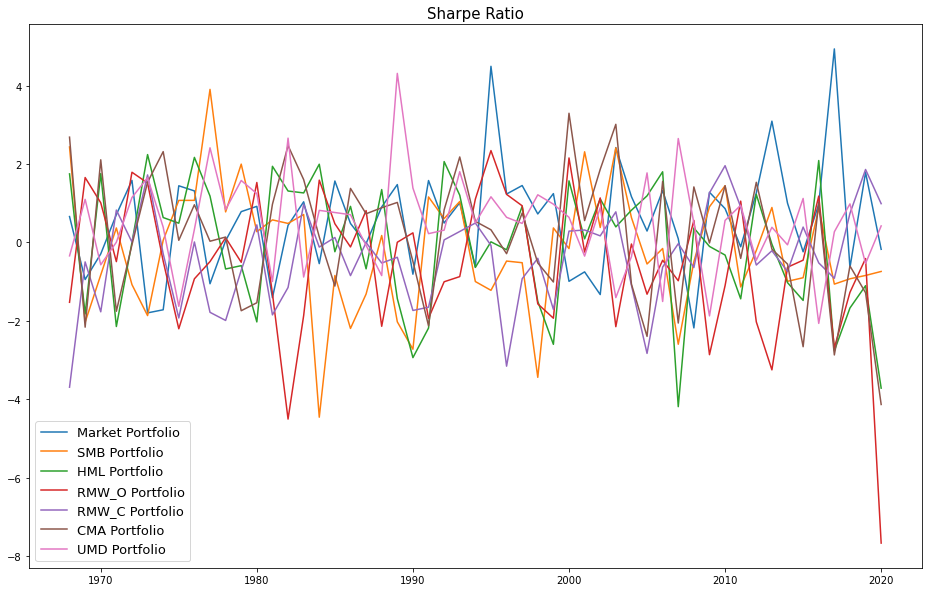

In [20]:
plt.figure(figsize=(16,10))
plt.plot(tear_sheet_mkt['Year'], tear_sheet_mkt['Sharpe'], label='Market Portfolio')
plt.plot(tear_sheet_SMB['Year'], tear_sheet_SMB['Sharpe'], label='SMB Portfolio')
plt.plot(tear_sheet_HML['Year'], tear_sheet_HML['Sharpe'], label='HML Portfolio')
plt.plot(tear_sheet_RMWO['Year'],tear_sheet_RMWO['Sharpe'], label='RMW_O Portfolio')
plt.plot(tear_sheet_RMWC['Year'], tear_sheet_RMWC['Sharpe'], label='RMW_C Portfolio')
plt.plot(tear_sheet_CMA['Year'], tear_sheet_CMA['Sharpe'], label='CMA Portfolio')
plt.plot(tear_sheet_UMD['Year'], tear_sheet_UMD['Sharpe'], label='UMD Portfolio')
plt.title('Sharpe Ratio', fontsize=15)
plt.legend(fontsize=13)
plt.show()

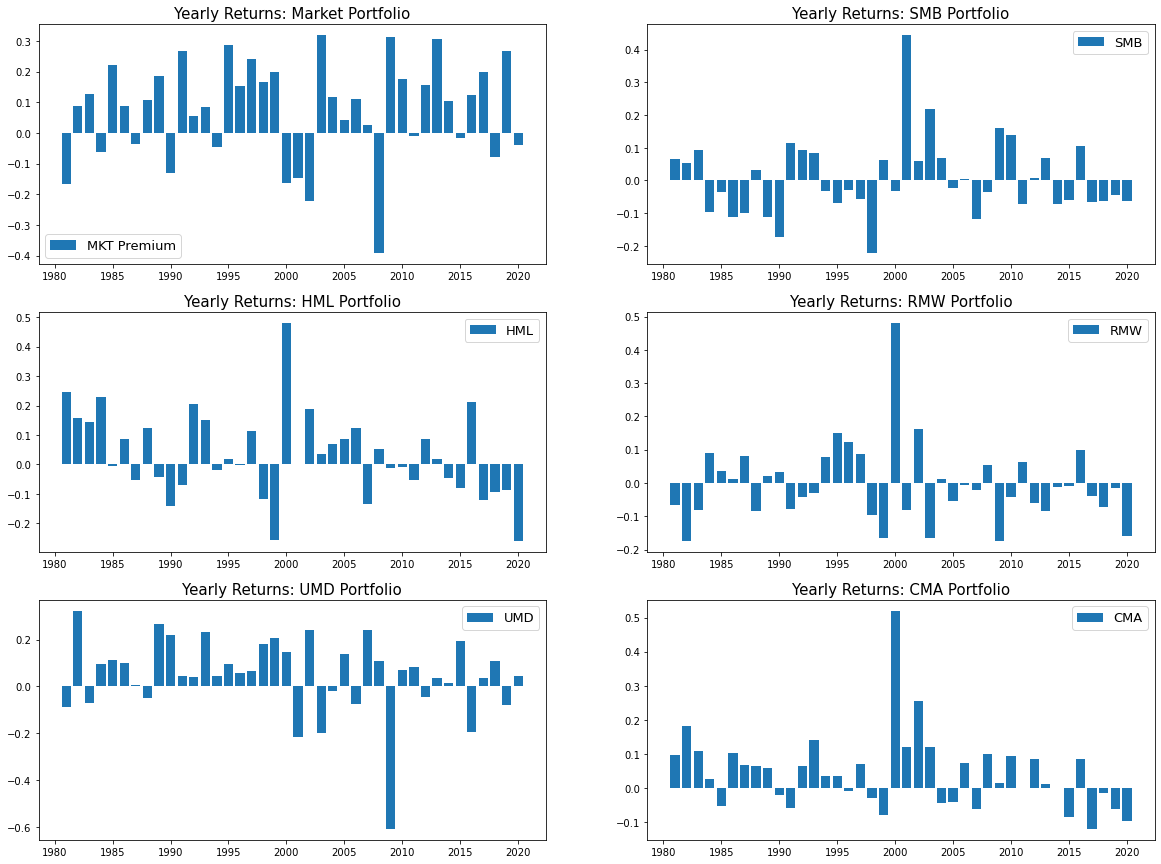

In [21]:
fig = plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.bar(tear_sheet_mkt[tear_sheet_mkt['Year']>1980]['Year'],
        tear_sheet_mkt[tear_sheet_mkt['Year']>1980]['Yearly Return'], label='MKT Premium')
plt.legend(fontsize=13)
plt.title('Yearly Returns: Market Portfolio', fontsize=15)

plt.subplot(3,2,2)
plt.bar(tear_sheet_SMB[tear_sheet_SMB['Year']>1980]['Year'],
        tear_sheet_SMB[tear_sheet_SMB['Year']>1980]['Yearly Return'], label='SMB')
plt.legend(fontsize=13)
plt.title('Yearly Returns: SMB Portfolio', fontsize=15)

plt.subplot(3,2,3)
plt.bar(tear_sheet_HML[tear_sheet_HML['Year']>1980]['Year'],
        tear_sheet_HML[tear_sheet_HML['Year']>1980]['Yearly Return'], label='HML')
plt.legend(fontsize=13)
plt.title('Yearly Returns: HML Portfolio', fontsize=15)

plt.subplot(3,2,4)
plt.bar(tear_sheet_RMWO[tear_sheet_RMWO['Year']>1980]['Year'],
        tear_sheet_RMWO[tear_sheet_RMWO['Year']>1980]['Yearly Return'], label='RMW')
plt.legend(fontsize=13)
plt.title('Yearly Returns: RMW Portfolio', fontsize=15)

plt.subplot(3,2,5)
plt.bar(tear_sheet_UMD[tear_sheet_UMD['Year']>1980]['Year'],
        tear_sheet_UMD[tear_sheet_UMD['Year']>1980]['Yearly Return'], label='UMD')
plt.legend(fontsize=13)
plt.title('Yearly Returns: UMD Portfolio', fontsize=15)

plt.subplot(3,2,6)
plt.bar(tear_sheet_CMA[tear_sheet_CMA['Year']>1980]['Year'],
        tear_sheet_CMA[tear_sheet_CMA['Year']>1980]['Yearly Return'], label='CMA')
plt.legend(fontsize=13)
plt.title('Yearly Returns: CMA Portfolio', fontsize=15)
plt.show()

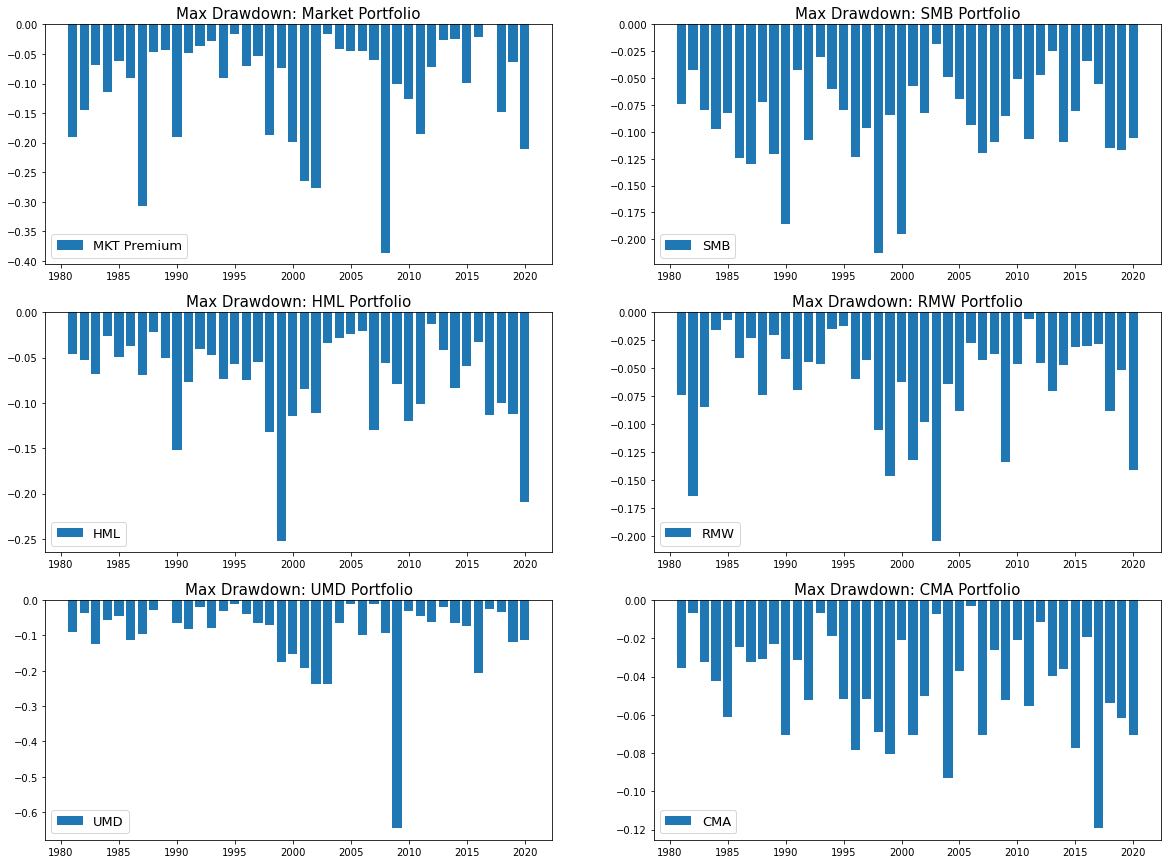

In [22]:
fig = plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.bar(tear_sheet_mkt[tear_sheet_mkt['Year']>1980]['Year'],
        tear_sheet_mkt[tear_sheet_mkt['Year']>1980]['Max Drawdown'], label='MKT Premium')
plt.legend(fontsize=13)
plt.title('Max Drawdown: Market Portfolio', fontsize=15)

plt.subplot(3,2,2)
plt.bar(tear_sheet_SMB[tear_sheet_SMB['Year']>1980]['Year'],
        tear_sheet_SMB[tear_sheet_SMB['Year']>1980]['Max Drawdown'], label='SMB')
plt.legend(fontsize=13)
plt.title('Max Drawdown: SMB Portfolio', fontsize=15)

plt.subplot(3,2,3)
plt.bar(tear_sheet_HML[tear_sheet_HML['Year']>1980]['Year'],
        tear_sheet_HML[tear_sheet_HML['Year']>1980]['Max Drawdown'], label='HML')
plt.legend(fontsize=13)
plt.title('Max Drawdown: HML Portfolio', fontsize=15)

plt.subplot(3,2,4)
plt.bar(tear_sheet_RMWO[tear_sheet_RMWO['Year']>1980]['Year'],
        tear_sheet_RMWO[tear_sheet_RMWO['Year']>1980]['Max Drawdown'], label='RMW')
plt.legend(fontsize=13)
plt.title('Max Drawdown: RMW Portfolio', fontsize=15)

plt.subplot(3,2,5)
plt.bar(tear_sheet_UMD[tear_sheet_UMD['Year']>1980]['Year'],
        tear_sheet_UMD[tear_sheet_UMD['Year']>1980]['Max Drawdown'], label='UMD')
plt.legend(fontsize=13)
plt.title('Max Drawdown: UMD Portfolio', fontsize=15)

plt.subplot(3,2,6)
plt.bar(tear_sheet_CMA[tear_sheet_CMA['Year']>1980]['Year'],
        tear_sheet_CMA[tear_sheet_CMA['Year']>1980]['Max Drawdown'], label='CMA')
plt.legend(fontsize=13)
plt.title('Max Drawdown: CMA Portfolio', fontsize=15)
plt.show()

## Table-1

In [23]:
df_table_1_Panel_A_Average_Ret = pd.DataFrame({
'Mkt':[df_fac_rets['MKT'].mean()],
'SMB':[df_fac_rets['SMB'].mean()],
'S-F':[(df_fac_rets['S']-df_fac_rets['RF']).mean()],
'B-F':[(df_fac_rets['B']-df_fac_rets['RF']).mean()]
}, index=['Market and size factors'])
df_table_1_Panel_A_Average_Ret

,Mkt,SMB,S-F,B-F
Market and size factors,0.008887,0.00103,0.006799,0.005769


In [24]:
df_table_1_Panel_A_tvalues = pd.DataFrame({
'Mkt':[df_fac_rets['MKT'].mean()/df_fac_rets['MKT'].sem()],
'SMB':[df_fac_rets['SMB'].mean()/df_fac_rets['SMB'].sem()],
'S-F':[(df_fac_rets['S']-df_fac_rets['RF']).mean()/(df_fac_rets['S']-df_fac_rets['RF']).sem()],
'B-F':[(df_fac_rets['B']-df_fac_rets['RF']).mean()/(df_fac_rets['B']-df_fac_rets['RF']).sem()]
}, index=['Market and size factors'])
df_table_1_Panel_A_tvalues

,Mkt,SMB,S-F,B-F
Market and size factors,4.897503,0.836973,2.716503,3.097992


In [25]:
df_table_1_Panel_B_Average_Ret = pd.DataFrame({
'Value':[df_fac_rets['HML'].mean(),
         df_fac_rets['HML_S'].mean(),
         df_fac_rets['HML_B'].mean(),
         (df_fac_rets['H']-df_fac_rets['RF']).mean(),
         (df_fac_rets['H_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['H_B']-df_fac_rets['RF']).mean(),
         (df_fac_rets['L']-df_fac_rets['RF']).mean(),
         (df_fac_rets['L_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['L_B']-df_fac_rets['RF']).mean(),
         df_fac_rets['HML_SMB'].mean(),
         (df_fac_rets['H_S']-df_fac_rets['H_B']).mean(),
         (df_fac_rets['L_S']-df_fac_rets['L_B']).mean()
        ],
'Prof_O':[df_fac_rets['RMW_A'].mean(),
         df_fac_rets['RMW_A_S'].mean(),
         df_fac_rets['RMW_A_B'].mean(),
         (df_fac_rets['R_A']-df_fac_rets['RF']).mean(),
         (df_fac_rets['R_A_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['R_A_B']-df_fac_rets['RF']).mean(),
         (df_fac_rets['W_A']-df_fac_rets['RF']).mean(),
         (df_fac_rets['W_A_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['W_A_B']-df_fac_rets['RF']).mean(),
         df_fac_rets['RMW_A_SMB'].mean(),
         (df_fac_rets['R_A_S']-df_fac_rets['R_A_B']).mean(),
         (df_fac_rets['W_A_S']-df_fac_rets['W_A_B']).mean()
        ],
'Prof_C':[df_fac_rets['RMW_C'].mean(),
         df_fac_rets['RMW_C_S'].mean(),
         df_fac_rets['RMW_C_B'].mean(),
         (df_fac_rets['R_C']-df_fac_rets['RF']).mean(),
         (df_fac_rets['R_C_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['R_C_B']-df_fac_rets['RF']).mean(),
         (df_fac_rets['W_C']-df_fac_rets['RF']).mean(),
         (df_fac_rets['W_C_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['W_C_B']-df_fac_rets['RF']).mean(),
         df_fac_rets['RMW_C_SMB'].mean(),
         (df_fac_rets['R_C_S']-df_fac_rets['R_C_B']).mean(),
         (df_fac_rets['W_C_S']-df_fac_rets['W_C_B']).mean()
        ],
'Inv':[df_fac_rets['CMA'].mean(),
         df_fac_rets['CMA_S'].mean(),
         df_fac_rets['CMA_B'].mean(),
         (df_fac_rets['C']-df_fac_rets['RF']).mean(),
         (df_fac_rets['C_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['C_B']-df_fac_rets['RF']).mean(),
         (df_fac_rets['A']-df_fac_rets['RF']).mean(),
         (df_fac_rets['A_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['A_B']-df_fac_rets['RF']).mean(),
         df_fac_rets['CMA_SMB'].mean(),
         (df_fac_rets['C_S']-df_fac_rets['C_B']).mean(),
         (df_fac_rets['A_S']-df_fac_rets['A_B']).mean()
        ],
'Mom':[df_fac_rets['UMD'].mean(),
         df_fac_rets['UMD_S'].mean(),
         df_fac_rets['UMD_B'].mean(),
         (df_fac_rets['U']-df_fac_rets['RF']).mean(),
         (df_fac_rets['U_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['U_B']-df_fac_rets['RF']).mean(),
         (df_fac_rets['D']-df_fac_rets['RF']).mean(),
         (df_fac_rets['D_S']-df_fac_rets['RF']).mean(),
         (df_fac_rets['D_B']-df_fac_rets['RF']).mean(),
         df_fac_rets['UMD_SMB'].mean(),
         (df_fac_rets['U_S']-df_fac_rets['U_B']).mean(),
         (df_fac_rets['D_S']-df_fac_rets['D_B']).mean()
        ],
}, index=['HML, RMW, CMA, UMD',
          'HML_S, RMW_S, CMA_S, UMD_S',
          'HML_B, RMW_B, CMA_B, UMD_B',
          'H-F, R-F, C-F, U-F',
          'H_S-F, R_S-F, C_S-F, U_S-F',
          'H_B-F, R_B-F, C_B-F, U_B-F',
          'L-F, W-F, A-F, D-F',
          'L_S-F, W_S-F, A_S-F, D_S-F',
          'L_B-F, W_B-F, A_B-F, D_B-F',
          'HML_SMB, RMW_SMB, CMA_SMB, UMD_SMB',
          'H_S-H_B, R_S-R_B, C_S-C_B, U_S-U_B',
          'L_S-L_B, W_S-W_B, A_S-A_B, D_S-D_B'
         ])
df_table_1_Panel_B_Average_Ret

,Value,Prof_O,Prof_C,Inv,Mom
"HML, RMW, CMA, UMD",0.002760,0.000058,-0.000665,0.003670,0.004855
"HML_S, RMW_S, CMA_S, UMD_S",0.004119,0.000736,-0.001115,0.004903,0.006352
"HML_B, RMW_B, CMA_B, UMD_B",0.001401,-0.000619,-0.000215,0.002437,0.003357
"H-F, R-F, C-F, U-F",0.007883,0.005828,0.005422,0.008019,0.008673
"H_S-F, R_S-F, C_S-F, U_S-F",0.008900,0.006456,0.005924,0.008954,0.009947
"H_B-F, R_B-F, C_B-F, U_B-F",0.006866,0.005199,0.004920,0.007084,0.007400
"L-F, W-F, A-F, D-F",0.005123,0.005769,0.006087,0.004349,0.003819
"L_S-F, W_S-F, A_S-F, D_S-F",0.004780,0.005720,0.007040,0.004051,0.003595
"L_B-F, W_B-F, A_B-F, D_B-F",0.005465,0.005818,0.005135,0.004647,0.004042
"HML_SMB, RMW_SMB, CMA_SMB, UMD_SMB",0.002719,0.001355,-0.000900,0.002466,0.002995


In [26]:
df_table_1_Panel_B_tvalues = pd.DataFrame({
'Value':[df_fac_rets['HML'].mean()/df_fac_rets['HML'].sem(),
         df_fac_rets['HML_S'].mean()/df_fac_rets['HML_S'].sem(),
         df_fac_rets['HML_B'].mean()/df_fac_rets['HML_B'].sem(),
         (df_fac_rets['H']-df_fac_rets['RF']).mean()/(df_fac_rets['H']-df_fac_rets['RF']).sem(),
         (df_fac_rets['H_S']-df_fac_rets['RF']).mean()/(df_fac_rets['H_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['H_B']-df_fac_rets['RF']).mean()/(df_fac_rets['H_B']-df_fac_rets['RF']).sem(),
         (df_fac_rets['L']-df_fac_rets['RF']).mean()/(df_fac_rets['L']-df_fac_rets['RF']).sem(),
         (df_fac_rets['L_S']-df_fac_rets['RF']).mean()/(df_fac_rets['L_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['L_B']-df_fac_rets['RF']).mean()/(df_fac_rets['L_B']-df_fac_rets['RF']).sem(),
         df_fac_rets['HML_SMB'].mean()/df_fac_rets['HML_SMB'].sem(),
         (df_fac_rets['H_S']-df_fac_rets['H_B']).mean()/(df_fac_rets['H_S']-df_fac_rets['H_B']).sem(),
         (df_fac_rets['L_S']-df_fac_rets['L_B']).mean()/(df_fac_rets['L_S']-df_fac_rets['L_B']).sem()
        ],
'Prof_O':[df_fac_rets['RMW_A'].mean()/df_fac_rets['RMW_A'].sem(),
         df_fac_rets['RMW_A_S'].mean()/df_fac_rets['RMW_A_S'].sem(),
         df_fac_rets['RMW_A_B'].mean()/df_fac_rets['RMW_A_B'].sem(),
         (df_fac_rets['R_A']-df_fac_rets['RF']).mean()/(df_fac_rets['R_A']-df_fac_rets['RF']).sem(),
         (df_fac_rets['R_A_S']-df_fac_rets['RF']).mean()/(df_fac_rets['R_A_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['R_A_B']-df_fac_rets['RF']).mean()/(df_fac_rets['R_A_B']-df_fac_rets['RF']).sem(),
         (df_fac_rets['W_A']-df_fac_rets['RF']).mean()/(df_fac_rets['W_A']-df_fac_rets['RF']).sem(),
         (df_fac_rets['W_A_S']-df_fac_rets['RF']).mean()/(df_fac_rets['W_A_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['W_A_B']-df_fac_rets['RF']).mean()/(df_fac_rets['W_A_B']-df_fac_rets['RF']).sem(),
         df_fac_rets['RMW_A_SMB'].mean()/df_fac_rets['RMW_A_SMB'].sem(),
         (df_fac_rets['R_A_S']-df_fac_rets['R_A_B']).mean()/(df_fac_rets['R_A_S']-df_fac_rets['R_A_B']).sem(),
         (df_fac_rets['W_A_S']-df_fac_rets['W_A_B']).mean()/(df_fac_rets['W_A_S']-df_fac_rets['W_A_B']).sem()
        ],
'Prof_C':[df_fac_rets['RMW_C'].mean()/df_fac_rets['RMW_C'].sem(),
         df_fac_rets['RMW_C_S'].mean()/df_fac_rets['RMW_C_S'].sem(),
         df_fac_rets['RMW_C_B'].mean()/df_fac_rets['RMW_C_B'].sem(),
         (df_fac_rets['R_C']-df_fac_rets['RF']).mean()/(df_fac_rets['R_C']-df_fac_rets['RF']).sem(),
         (df_fac_rets['R_C_S']-df_fac_rets['RF']).mean()/(df_fac_rets['R_C_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['R_C_B']-df_fac_rets['RF']).mean()/(df_fac_rets['R_C_B']-df_fac_rets['RF']).sem(),
         (df_fac_rets['W_C']-df_fac_rets['RF']).mean()/(df_fac_rets['W_C']-df_fac_rets['RF']).sem(),
         (df_fac_rets['W_C_S']-df_fac_rets['RF']).mean()/(df_fac_rets['W_C_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['W_C_B']-df_fac_rets['RF']).mean()/(df_fac_rets['W_C_B']-df_fac_rets['RF']).sem(),
         df_fac_rets['RMW_C_SMB'].mean()/df_fac_rets['RMW_C_SMB'].sem(),
         (df_fac_rets['R_C_S']-df_fac_rets['R_C_B']).mean()/(df_fac_rets['R_C_S']-df_fac_rets['R_C_B']).sem(),
         (df_fac_rets['W_C_S']-df_fac_rets['W_C_B']).mean()/(df_fac_rets['W_C_S']-df_fac_rets['W_C_B']).sem()
        ],
'Inv':[df_fac_rets['CMA'].mean()/df_fac_rets['CMA'].sem(),
         df_fac_rets['CMA_S'].mean()/df_fac_rets['CMA_S'].sem(),
         df_fac_rets['CMA_B'].mean()/df_fac_rets['CMA_B'].sem(),
         (df_fac_rets['C']-df_fac_rets['RF']).mean()/(df_fac_rets['C']-df_fac_rets['RF']).sem(),
         (df_fac_rets['C_S']-df_fac_rets['RF']).mean()/(df_fac_rets['C_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['C_B']-df_fac_rets['RF']).mean()/(df_fac_rets['C_B']-df_fac_rets['RF']).sem(),
         (df_fac_rets['A']-df_fac_rets['RF']).mean()/(df_fac_rets['A']-df_fac_rets['RF']).sem(),
         (df_fac_rets['A_S']-df_fac_rets['RF']).mean()/(df_fac_rets['A_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['A_B']-df_fac_rets['RF']).mean()/(df_fac_rets['A_B']-df_fac_rets['RF']).sem(),
         df_fac_rets['CMA_SMB'].mean()/df_fac_rets['CMA_SMB'].sem(),
         (df_fac_rets['C_S']-df_fac_rets['C_B']).mean()/(df_fac_rets['C_S']-df_fac_rets['C_B']).sem(),
         (df_fac_rets['A_S']-df_fac_rets['A_B']).mean()/(df_fac_rets['A_S']-df_fac_rets['A_B']).sem()
        ],
'Mom':[df_fac_rets['UMD'].mean()/df_fac_rets['UMD'].sem(),
         df_fac_rets['UMD_S'].mean()/df_fac_rets['UMD_S'].sem(),
         df_fac_rets['UMD_B'].mean()/df_fac_rets['UMD_B'].sem(),
         (df_fac_rets['U']-df_fac_rets['RF']).mean()/(df_fac_rets['U']-df_fac_rets['RF']).sem(),
         (df_fac_rets['U_S']-df_fac_rets['RF']).mean()/(df_fac_rets['U_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['U_B']-df_fac_rets['RF']).mean()/(df_fac_rets['U_B']-df_fac_rets['RF']).sem(),
         (df_fac_rets['D']-df_fac_rets['RF']).mean()/(df_fac_rets['D']-df_fac_rets['RF']).sem(),
         (df_fac_rets['D_S']-df_fac_rets['RF']).mean()/(df_fac_rets['D_S']-df_fac_rets['RF']).sem(),
         (df_fac_rets['D_B']-df_fac_rets['RF']).mean()/(df_fac_rets['D_B']-df_fac_rets['RF']).sem(),
         df_fac_rets['UMD_SMB'].mean()/df_fac_rets['UMD_SMB'].sem(),
         (df_fac_rets['U_S']-df_fac_rets['U_B']).mean()/(df_fac_rets['U_S']-df_fac_rets['U_B']).sem(),
         (df_fac_rets['D_S']-df_fac_rets['D_B']).mean()/(df_fac_rets['D_S']-df_fac_rets['D_B']).sem()
        ],
}, index=['HML, RMW, CMA, UMD',
          'HML_S, RMW_S, CMA_S, UMD_S',
          'HML_B, RMW_B, CMA_B, UMD_B',
          'H-F, R-F, C-F, U-F',
          'H_S-F, R_S-F, C_S-F, U_S-F',
          'H_B-F, R_B-F, C_B-F, U_B-F',
          'L-F, W-F, A-F, D-F',
          'L_S-F, W_S-F, A_S-F, D_S-F',
          'L_B-F, W_B-F, A_B-F, D_B-F',
          'HML_SMB, RMW_SMB, CMA_SMB, UMD_SMB',
          'H_S-H_B, R_S-R_B, C_S-C_B, U_S-U_B',
          'L_S-L_B, W_S-W_B, A_S-A_B, D_S-D_B'
         ])
df_table_1_Panel_B_tvalues

,Value,Prof_O,Prof_C,Inv,Mom
"HML, RMW, CMA, UMD",2.160028,0.059267,-0.640802,4.238070,2.658809
"HML_S, RMW_S, CMA_S, UMD_S",2.901987,0.582172,-0.728592,5.604443,3.523736
"HML_B, RMW_B, CMA_B, UMD_B",1.005148,-0.582730,-0.165352,2.223347,1.645696
"H-F, R-F, C-F, U-F",3.702452,2.924897,2.151041,3.818448,4.083019
"H_S-F, R_S-F, C_S-F, U_S-F",3.719400,2.749436,1.879532,3.512754,4.068506
"H_B-F, R_B-F, C_B-F, U_B-F",3.413509,2.823840,2.262780,3.846300,3.785628
"L-F, W-F, A-F, D-F",2.199482,2.326413,2.489660,1.804524,1.379459
"L_S-F, W_S-F, A_S-F, D_S-F",1.640787,1.957226,2.458630,1.450803,1.167770
"L_B-F, W_B-F, A_B-F, D_B-F",2.819400,2.624783,2.154254,2.122108,1.529018
"HML_SMB, RMW_SMB, CMA_SMB, UMD_SMB",2.311070,1.080286,-0.464446,2.551668,2.455906


## Table-2

In [27]:
df_table_2_coeff = pd.DataFrame({'Int':[model_SMB.params['Intercept'],
        model_HML.params['Intercept'],
        model_RMWO.params['Intercept'],
        model_RMWC.params['Intercept'],
        model_CMA.params['Intercept'],
        model_UMD_O.params['Intercept'],
        model_UMD_C.params['Intercept']
       ],
'Mkt':[model_SMB.params['MKT_RF'],
       model_HML.params['MKT_RF'],
       model_RMWO.params['MKT_RF'],
       model_RMWC.params['MKT_RF'],
       model_CMA.params['MKT_RF'],
       model_UMD_O.params['MKT_RF'],
       model_UMD_C.params['MKT_RF']
      ],
'SMB':['',
       '',
       model_RMWO.params['SMB'],
       model_RMWC.params['SMB'],
       model_CMA.params['SMB'],
       model_UMD_O.params['SMB'],
       model_UMD_C.params['SMB']
      ],
'HML':['',
       '',
       model_RMWO.params['HML'],
       model_RMWC.params['HML'],
       model_CMA.params['HML'],
       model_UMD_O.params['HML'],
       model_UMD_C.params['HML']
      ],
'RMWO':['',
        '',
        '',
        '',
        '',
        model_UMD_O.params['RMW_A'],
        ''
       ],
'RMWC':['',
        '',
        '',
        '',
        '',
        '',
        model_UMD_C.params['RMW_C']    
       ],
'CMA':['',
        '',
        '',
        '',
        '',
        model_UMD_O.params['CMA'],
        model_UMD_C.params['CMA']
      ]
}, index=['SMB', 'HML', 'RMWO', 'RMWC', 'CMA', 'UMD', 'UMD'])
df_table_2_coeff

,Int,Mkt,SMB,HML,RMWO,RMWC,CMA
SMB,-0.000084,0.218492,,,,,
HML,0.003733,-0.191030,,,,,
RMWO,0.000263,-0.079025,-0.352946,0.203241,,,
RMWC,-0.001396,0.056962,-0.070795,0.186152,,,
CMA,0.002887,-0.094021,-0.000613,0.457291,,,
UMD,0.005016,-0.097562,-0.147251,-0.484568,0.471852,,0.489567
UMD,0.004962,-0.126808,-0.327517,-0.338099,,-0.193628,0.457803


In [28]:
df_table_2_tvalues = pd.DataFrame({'Int':[model_SMB.tvalues['Intercept'],
        model_HML.tvalues['Intercept'],
        model_RMWO.tvalues['Intercept'],
        model_RMWC.tvalues['Intercept'],
        model_CMA.tvalues['Intercept'],
        model_UMD_O.tvalues['Intercept'],
        model_UMD_C.tvalues['Intercept']
       ],
'Mkt':[model_SMB.tvalues['MKT_RF'],
       model_HML.tvalues['MKT_RF'],
       model_RMWO.tvalues['MKT_RF'],
       model_RMWC.tvalues['MKT_RF'],
       model_CMA.tvalues['MKT_RF'],
       model_UMD_O.tvalues['MKT_RF'],
       model_UMD_C.tvalues['MKT_RF']
      ],
'SMB':['',
       '',
       model_RMWO.tvalues['SMB'],
       model_RMWC.tvalues['SMB'],
       model_CMA.tvalues['SMB'],
       model_UMD_O.tvalues['SMB'],
       model_UMD_C.tvalues['SMB']
      ],
'HML':['',
       '',
       model_RMWO.tvalues['HML'],
       model_RMWC.tvalues['HML'],
       model_CMA.tvalues['HML'],
       model_UMD_O.tvalues['HML'],
       model_UMD_C.tvalues['HML']
      ],
'RMWO':['',
        '',
        '',
        '',
        '',
        model_UMD_O.tvalues['RMW_A'],
        ''
       ],
'RMWC':['',
        '',
        '',
        '',
        '',
        '',
        model_UMD_C.tvalues['RMW_C']    
       ],
'CMA':['',
        '',
        '',
        '',
        '',
        model_UMD_O.tvalues['CMA'],
        model_UMD_C.tvalues['CMA']
      ]
}, index=['SMB', 'HML', 'RMWO', 'RMWC', 'CMA', 'UMD', 'UMD'])
df_table_2_tvalues

,Int,Mkt,SMB,HML,RMWO,RMWC,CMA
SMB,-0.071262,8.513467,,,,,
HML,3.014806,-7.046405,,,,,
RMWO,0.327679,-4.114020,-12.898321,7.845851,,,
RMWC,-1.360178,2.321710,-2.025577,5.626228,,,
CMA,4.987410,-6.795210,-0.031122,24.50758,,,
UMD,2.890386,-2.277524,-2.255618,-6.055111,5.527072,,4.130694
UMD,2.803951,-2.939294,-5.538547,-4.290175,,-2.849655,3.799677


In [29]:
df_table_2_r2 = pd.DataFrame({'R2':[model_SMB.rsquared,
        model_HML.rsquared,
        model_RMWO.rsquared,
        model_RMWC.rsquared,
        model_CMA.rsquared,
        model_UMD_O.rsquared,
        model_UMD_C.rsquared
       ]
}, index=['SMB', 'HML', 'RMWO', 'RMWC', 'CMA', 'UMD_O', 'UMD_C'])
df_table_2_r2

,R2
SMB,0.104515
HML,0.074035
RMWO,0.355150
RMWC,0.052881
CMA,0.567104
UMD_O,0.162171
UMD_C,0.132112


In [30]:
df_table_2_se = pd.DataFrame({'s(e)':[np.array(model_SMB.bse).T@np.linalg.inv(np.array(model_SMB.cov_params()))@np.array(model_SMB.bse),
        np.array(model_HML.bse).T@np.linalg.inv(np.array(model_HML.cov_params()))@np.array(model_HML.bse),
        np.array(model_RMWO.bse).T@np.linalg.inv(np.array(model_RMWO.cov_params()))@np.array(model_RMWO.bse),
        np.array(model_RMWC.bse).T@np.linalg.inv(np.array(model_RMWC.cov_params()))@np.array(model_RMWC.bse),
        np.array(model_CMA.bse).T@np.linalg.inv(np.array(model_CMA.cov_params()))@np.array(model_CMA.bse),
        np.array(model_UMD_O.bse).T@np.linalg.inv(np.array(model_UMD_O.cov_params()))@np.array(model_UMD_O.bse),
        np.array(model_UMD_C.bse).T@np.linalg.inv(np.array(model_UMD_C.cov_params()))@np.array(model_UMD_C.bse)
       ]
}, index=['SMB', 'HML', 'RMWO', 'RMWC', 'CMA', 'UMD_O', 'UMD_C'])
df_table_2_se

,s(e)
SMB,2.251060
HML,2.251060
RMWO,5.067712
RMWC,5.067712
CMA,5.067712
UMD_O,12.655025
UMD_C,12.928903


In [31]:
df_table_2_r2.join(df_table_2_se, how='inner')

,R2,s(e)
SMB,0.104515,2.251060
HML,0.074035,2.251060
RMWO,0.355150,5.067712
RMWC,0.052881,5.067712
CMA,0.567104,5.067712
UMD_O,0.162171,12.655025
UMD_C,0.132112,12.928903


## Correlation Matrix

<AxesSubplot:>

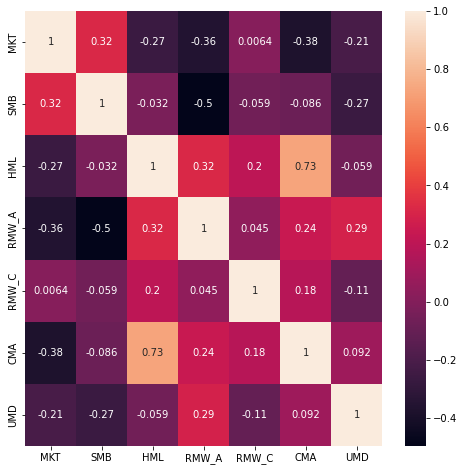

In [32]:
plt.figure(figsize=(8,8))
sns.heatmap(df_fac_rets[['MKT','SMB','HML','RMW_A','RMW_C','CMA','UMD']].corr(), annot=True)

# Table-3
- Comparison of six-factor models that include an operating profitability (OP) or a cash profitability (CP) factor

##### Actual

In [33]:
df_target = pd.read_csv('data/Target_Nonfactor_Returns.csv')
df_target['date'] = pd.to_datetime(df_target['date'])
df_target = df_target.sort_values(by=['Portfolio','date']).reset_index(drop=True)
df_target.drop_duplicates(subset=['Portfolio', 'date'], inplace=True)
df_target = df_target[(df_target['date']>=df_fac_rets['Date'].min()) & (df_target['date']<=df_fac_rets['Date'].max())].sort_values(['Portfolio','date']).reset_index(drop=True)
df_target

,date,Portfolio,ret
0,1968-07-31,BIG HiBM,0.010380
1,1968-08-31,BIG HiBM,0.028192
2,1968-09-30,BIG HiBM,0.082914
3,1968-10-31,BIG HiBM,0.011604
4,1968-11-30,BIG HiBM,0.040898
...,...,...,...
15595,2020-02-29,SMALL LoBM,-0.060697
15596,2020-03-31,SMALL LoBM,-0.214445
15597,2020-04-30,SMALL LoBM,0.246779
15598,2020-05-31,SMALL LoBM,0.121994


In [34]:
#Creating additional spread factor portfolios
df_fac_rets['S_F'] = df_fac_rets['S'] - df_fac_rets['RF']
df_fac_rets['H_F'] = df_fac_rets['H'] - df_fac_rets['RF']
df_fac_rets['H_S_F'] = df_fac_rets['H_S'] - df_fac_rets['RF']
df_fac_rets['R_A_F'] = df_fac_rets['R_A'] - df_fac_rets['RF']
df_fac_rets['C_F'] = df_fac_rets['C'] - df_fac_rets['RF']
df_fac_rets['U_F'] = df_fac_rets['U'] - df_fac_rets['RF']
df_fac_rets['R_A_S_F'] = df_fac_rets['R_A_S'] - df_fac_rets['RF']
df_fac_rets['C_S_F'] = df_fac_rets['C_S'] - df_fac_rets['RF']
df_fac_rets['U_S_F'] = df_fac_rets['U_S'] - df_fac_rets['RF']
df_fac_rets['L_F'] = df_fac_rets['L'] - df_fac_rets['RF']
df_fac_rets['W_A_F'] = df_fac_rets['W_A'] - df_fac_rets['RF']
df_fac_rets['A_F'] = df_fac_rets['A'] - df_fac_rets['RF']
df_fac_rets['D_F'] = df_fac_rets['D'] - df_fac_rets['RF']
df_fac_rets['L_S_F'] = df_fac_rets['L_S'] - df_fac_rets['RF']
df_fac_rets['W_A_S_F'] = df_fac_rets['W_A_S'] - df_fac_rets['RF']
df_fac_rets['A_S_F'] = df_fac_rets['A_S'] - df_fac_rets['RF']
df_fac_rets['D_S_F'] = df_fac_rets['D_S'] - df_fac_rets['RF']
df_fac_rets['R_C_F'] = df_fac_rets['R_C'] - df_fac_rets['RF']
df_fac_rets['R_C_S_F'] = df_fac_rets['R_C_S'] - df_fac_rets['RF']
df_fac_rets['W_C_F'] = df_fac_rets['W_C'] - df_fac_rets['RF']
df_fac_rets['W_C_S_F'] = df_fac_rets['W_C_S'] - df_fac_rets['RF']
df_fac_rets

,Date,RF,MKT,S,B,SMB,H,L,HML,H_S,...,A_F,D_F,L_S_F,W_A_S_F,A_S_F,D_S_F,R_C_F,R_C_S_F,W_C_F,W_C_S_F
0,1968-07-31,0.0048,-0.022024,-0.038164,-0.017192,-0.020973,0.007493,-0.059025,0.066518,0.006490,...,-0.056654,-0.037366,-0.070153,-0.048546,-0.067286,-0.049599,-0.103704,-0.159839,-0.089655,-0.029061
1,1968-08-31,0.0042,0.018037,0.040424,0.016679,0.023745,0.035886,0.021181,0.014704,0.049678,...,0.023376,0.015286,0.028362,0.035606,0.038470,0.021571,-0.034824,0.014149,0.026035,-0.041111
2,1968-09-30,0.0043,0.044454,0.069731,0.043225,0.026506,0.055910,0.052097,0.003813,0.061571,...,0.046374,0.058697,0.074921,0.067940,0.070600,0.063110,0.131992,0.049754,0.201757,0.074314
3,1968-10-31,0.0044,0.009041,0.009533,0.004370,0.005163,0.027136,-0.012722,0.039857,0.022086,...,-0.017471,0.001245,-0.010668,-0.000217,-0.007338,0.000465,-0.043937,-0.072776,-0.047991,-0.017622
4,1968-11-30,0.0042,0.058501,0.076939,0.059936,0.017003,0.061075,0.080104,-0.019029,0.069928,...,0.075301,0.074624,0.086878,0.074754,0.083506,0.072471,0.071786,-0.015624,0.071134,0.077783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2020-02-29,0.0012,-0.077918,-0.090227,-0.084726,-0.005502,-0.110770,-0.066237,-0.044533,-0.106680,...,-0.070826,-0.084912,-0.064422,-0.071027,-0.073286,-0.092443,-0.088161,-0.106322,-0.095789,-0.108214
619,2020-03-31,0.0013,-0.141733,-0.245046,-0.143991,-0.101054,-0.280640,-0.150905,-0.129734,-0.303208,...,-0.186619,-0.265857,-0.213573,-0.236829,-0.244006,-0.274700,-0.242594,-0.336483,-0.211087,-0.299864
620,2020-04-30,0.0000,0.129677,0.203709,0.149739,0.053970,0.206505,0.182265,0.024240,0.239935,...,0.185968,0.239887,0.223296,0.222217,0.210128,0.274160,0.222196,0.312138,0.198984,0.266998
621,2020-05-31,0.0001,0.053739,0.066052,0.053502,0.012551,0.038991,0.087354,-0.048363,0.042365,...,0.082945,0.062011,0.115180,0.090845,0.098827,0.092692,0.077243,0.092750,0.059913,0.062580


In [35]:
'''
Actual: Vector of Regression Intercepts (or alpha)
'''

#Operating Profitability
a_model_6F_Op_Prft_1 = []
a_model_6F_Op_Prft_2 = []
a_model_6F_Op_Prft_3 = []
a_model_6F_Op_Prft_4 = []
a_model_6F_Op_Prft_5 = []
a_model_6F_Op_Prft_6 = []

#Cash Profitability
a_model_6F_Cs_Prft_1 = []
a_model_6F_Cs_Prft_2 = []
a_model_6F_Cs_Prft_3 = []
a_model_6F_Cs_Prft_4 = []
a_model_6F_Cs_Prft_5 = []
a_model_6F_Cs_Prft_6 = []


'''
Gathering the Residuals - Residual Covariance Matrices computations
'''

#Operating Profitability
residual_model_6F_Op_Prft_1 = []
residual_model_6F_Op_Prft_2 = []
residual_model_6F_Op_Prft_3 = []
residual_model_6F_Op_Prft_4 = []
residual_model_6F_Op_Prft_5 = []
residual_model_6F_Op_Prft_6 = []

#Cash Profitability
residual_model_6F_Cs_Prft_1 = []
residual_model_6F_Cs_Prft_2 = []
residual_model_6F_Cs_Prft_3 = []
residual_model_6F_Cs_Prft_4 = []
residual_model_6F_Cs_Prft_5 = []
residual_model_6F_Cs_Prft_6 = []

for each_portfolio in df_target['Portfolio'].unique():
    print("Portfolio:",each_portfolio)
    
    #Operating Profitability
    df_combined = df_fac_rets.copy(deep=False)
    
    df_combined = df_combined.merge(df_target[df_target['Portfolio']==each_portfolio][['date','ret']], left_on='Date', right_on='date')
    df_combined.drop('date', axis=1, inplace=True)
    df_combined['ret_RF'] = df_combined['ret'] - df_combined['RF']

    model_6F_Op_Prft_1 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML + RMW_A + CMA + UMD', data= df_combined).fit()
    model_6F_Op_Prft_2 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML_S + RMW_A_S + CMA_S + UMD_S', data= df_combined).fit()
    model_6F_Op_Prft_3 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_F + R_A_F + C_F + U_F', data= df_combined).fit()
    model_6F_Op_Prft_4 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_S_F + R_A_S_F + C_S_F + U_S_F', data= df_combined).fit()
    model_6F_Op_Prft_5 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_F + W_A_F + A_F + D_F', data= df_combined).fit()
    model_6F_Op_Prft_6 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_S_F + W_A_S_F + A_S_F + D_S_F', data= df_combined).fit()
      
    a_model_6F_Op_Prft_1.append(model_6F_Op_Prft_1.params['Intercept'])
    a_model_6F_Op_Prft_2.append(model_6F_Op_Prft_2.params['Intercept'])
    a_model_6F_Op_Prft_3.append(model_6F_Op_Prft_3.params['Intercept'])
    a_model_6F_Op_Prft_4.append(model_6F_Op_Prft_4.params['Intercept'])
    a_model_6F_Op_Prft_5.append(model_6F_Op_Prft_5.params['Intercept'])
    a_model_6F_Op_Prft_6.append(model_6F_Op_Prft_6.params['Intercept'])
    
    residual_model_6F_Op_Prft_1.append((df_combined['ret_RF'] - model_6F_Op_Prft_1.predict()).values)
    residual_model_6F_Op_Prft_2.append((df_combined['ret_RF'] - model_6F_Op_Prft_2.predict()).values)
    residual_model_6F_Op_Prft_3.append((df_combined['ret_RF'] - model_6F_Op_Prft_3.predict()).values)
    residual_model_6F_Op_Prft_4.append((df_combined['ret_RF'] - model_6F_Op_Prft_4.predict()).values)
    residual_model_6F_Op_Prft_5.append((df_combined['ret_RF'] - model_6F_Op_Prft_5.predict()).values)
    residual_model_6F_Op_Prft_6.append((df_combined['ret_RF'] - model_6F_Op_Prft_6.predict()).values)
   
    #Cash Profitability    
    model_6F_Cs_Prft_1 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML + RMW_C + CMA + UMD', data= df_combined).fit()
    model_6F_Cs_Prft_2 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML_S + RMW_C_S + CMA_S + UMD_S', data= df_combined).fit()
    model_6F_Cs_Prft_3 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_F + R_C_F + C_F + U_F', data= df_combined).fit()
    model_6F_Cs_Prft_4 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_S_F + R_C_S_F + C_S_F + U_S_F', data= df_combined).fit()
    model_6F_Cs_Prft_5 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_F + W_C_F + A_F + D_F', data= df_combined).fit()
    model_6F_Cs_Prft_6 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_S_F + W_C_S_F + A_S_F + D_S_F', data= df_combined).fit()
    
    a_model_6F_Cs_Prft_1.append(model_6F_Cs_Prft_1.params['Intercept'])
    a_model_6F_Cs_Prft_2.append(model_6F_Cs_Prft_2.params['Intercept'])
    a_model_6F_Cs_Prft_3.append(model_6F_Cs_Prft_3.params['Intercept'])
    a_model_6F_Cs_Prft_4.append(model_6F_Cs_Prft_4.params['Intercept'])
    a_model_6F_Cs_Prft_5.append(model_6F_Cs_Prft_5.params['Intercept'])
    a_model_6F_Cs_Prft_6.append(model_6F_Cs_Prft_6.params['Intercept'])
    
    residual_model_6F_Cs_Prft_1.append((df_combined['ret_RF'] - model_6F_Cs_Prft_1.predict()).values)
    residual_model_6F_Cs_Prft_2.append((df_combined['ret_RF'] - model_6F_Cs_Prft_2.predict()).values)
    residual_model_6F_Cs_Prft_3.append((df_combined['ret_RF'] - model_6F_Cs_Prft_3.predict()).values)
    residual_model_6F_Cs_Prft_4.append((df_combined['ret_RF'] - model_6F_Cs_Prft_4.predict()).values)
    residual_model_6F_Cs_Prft_5.append((df_combined['ret_RF'] - model_6F_Cs_Prft_5.predict()).values)
    residual_model_6F_Cs_Prft_6.append((df_combined['ret_RF'] - model_6F_Cs_Prft_6.predict()).values)

    del df_combined

Portfolio: BIG HiBM
Portfolio: BIG LoBM
Portfolio: ME1 BM2
Portfolio: ME1 BM3
Portfolio: ME1 BM4
Portfolio: ME2 BM1
Portfolio: ME2 BM2
Portfolio: ME2 BM3
Portfolio: ME2 BM4
Portfolio: ME2 BM5
Portfolio: ME3 BM1
Portfolio: ME3 BM2
Portfolio: ME3 BM3
Portfolio: ME3 BM4
Portfolio: ME3 BM5
Portfolio: ME4 BM1
Portfolio: ME4 BM2
Portfolio: ME4 BM3
Portfolio: ME4 BM4
Portfolio: ME4 BM5
Portfolio: ME5 BM2
Portfolio: ME5 BM3
Portfolio: ME5 BM4
Portfolio: SMALL HiBM
Portfolio: SMALL LoBM


In [36]:
# def array_size_adjust(arr):
#     min_len = len(arr[0])
#     for each_arr in arr:
#         if len(each_arr)<min_len:
#             min_len = len(each_arr)

#     for i in range(len(arr)):
#         arr[i] = arr[i][len(arr[i])-min_len:]
        
#     return arr

In [37]:
# '''
# Adjusting the size of US Stocks time series to compute residual covariance matrix
# '''

# #Operating Profitability
# residual_model_6F_Op_Prft_1 = array_size_adjust(np.array(residual_model_6F_Op_Prft_1))
# residual_model_6F_Op_Prft_2 = array_size_adjust(np.array(residual_model_6F_Op_Prft_2))
# residual_model_6F_Op_Prft_3 = array_size_adjust(np.array(residual_model_6F_Op_Prft_3))
# residual_model_6F_Op_Prft_4 = array_size_adjust(np.array(residual_model_6F_Op_Prft_4))
# residual_model_6F_Op_Prft_5 = array_size_adjust(np.array(residual_model_6F_Op_Prft_5))
# residual_model_6F_Op_Prft_6 = array_size_adjust(np.array(residual_model_6F_Op_Prft_6))

# #Cash Profitability
# residual_model_6F_Cs_Prft_1 = array_size_adjust(np.array(residual_model_6F_Cs_Prft_1))
# residual_model_6F_Cs_Prft_2 = array_size_adjust(np.array(residual_model_6F_Cs_Prft_2))
# residual_model_6F_Cs_Prft_3 = array_size_adjust(np.array(residual_model_6F_Cs_Prft_3))
# residual_model_6F_Cs_Prft_4 = array_size_adjust(np.array(residual_model_6F_Cs_Prft_4))
# residual_model_6F_Cs_Prft_5 = array_size_adjust(np.array(residual_model_6F_Cs_Prft_5))
# residual_model_6F_Cs_Prft_6 = array_size_adjust(np.array(residual_model_6F_Cs_Prft_6))

In [38]:
'''
VARIANCE-COVARIANCE MATRIX of RESIDUALS
'''

#Operating Profitability
sigma_model_6F_Op_Prft_1 = np.cov(list(residual_model_6F_Op_Prft_1))
sigma_model_6F_Op_Prft_2 = np.cov(list(residual_model_6F_Op_Prft_2))
sigma_model_6F_Op_Prft_3 = np.cov(list(residual_model_6F_Op_Prft_3))
sigma_model_6F_Op_Prft_4 = np.cov(list(residual_model_6F_Op_Prft_4))
sigma_model_6F_Op_Prft_5 = np.cov(list(residual_model_6F_Op_Prft_5))
sigma_model_6F_Op_Prft_6 = np.cov(list(residual_model_6F_Op_Prft_6))

#Cash Profitability
sigma_model_6F_Cs_Prft_1 = np.cov(list(residual_model_6F_Cs_Prft_1))
sigma_model_6F_Cs_Prft_2 = np.cov(list(residual_model_6F_Cs_Prft_2))
sigma_model_6F_Cs_Prft_3 = np.cov(list(residual_model_6F_Cs_Prft_3))
sigma_model_6F_Cs_Prft_4 = np.cov(list(residual_model_6F_Cs_Prft_4))
sigma_model_6F_Cs_Prft_5 = np.cov(list(residual_model_6F_Cs_Prft_5))
sigma_model_6F_Cs_Prft_6 = np.cov(list(residual_model_6F_Cs_Prft_6))

In [39]:
#Panel-A table
multi_index = [np.array(['Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability'
                        ]),
                np.array(['Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R_O–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_O–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

# cols = pd.MultiIndex.from_tuples([('Full-sample')])

data = [np.array(a_model_6F_Op_Prft_1).T@np.linalg.inv(sigma_model_6F_Op_Prft_1)@np.array(a_model_6F_Op_Prft_1),
        np.array(a_model_6F_Op_Prft_2).T@np.linalg.inv(sigma_model_6F_Op_Prft_2)@np.array(a_model_6F_Op_Prft_2),
        np.array(a_model_6F_Op_Prft_3).T@np.linalg.inv(sigma_model_6F_Op_Prft_3)@np.array(a_model_6F_Op_Prft_3),
        np.array(a_model_6F_Op_Prft_4).T@np.linalg.inv(sigma_model_6F_Op_Prft_4)@np.array(a_model_6F_Op_Prft_4),
        np.array(a_model_6F_Op_Prft_5).T@np.linalg.inv(sigma_model_6F_Op_Prft_5)@np.array(a_model_6F_Op_Prft_5),
        np.array(a_model_6F_Op_Prft_6).T@np.linalg.inv(sigma_model_6F_Op_Prft_6)@np.array(a_model_6F_Op_Prft_6),
        np.array(a_model_6F_Cs_Prft_1).T@np.linalg.inv(sigma_model_6F_Cs_Prft_1)@np.array(a_model_6F_Cs_Prft_1),
        np.array(a_model_6F_Cs_Prft_2).T@np.linalg.inv(sigma_model_6F_Cs_Prft_2)@np.array(a_model_6F_Cs_Prft_2),
        np.array(a_model_6F_Cs_Prft_3).T@np.linalg.inv(sigma_model_6F_Cs_Prft_3)@np.array(a_model_6F_Cs_Prft_3),
        np.array(a_model_6F_Cs_Prft_4).T@np.linalg.inv(sigma_model_6F_Cs_Prft_4)@np.array(a_model_6F_Cs_Prft_4),
        np.array(a_model_6F_Cs_Prft_5).T@np.linalg.inv(sigma_model_6F_Cs_Prft_5)@np.array(a_model_6F_Cs_Prft_5),
        np.array(a_model_6F_Cs_Prft_6).T@np.linalg.inv(sigma_model_6F_Cs_Prft_6)@np.array(a_model_6F_Cs_Prft_6)
       ]


table_3a1 = pd.DataFrame(data, columns=[('Actual')],index=multi_index)
table_3a1

Actual
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD         0.134173
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S  0.121574
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F          0.160432
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F  0.161620
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F          0.144983
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F  0.124277
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD         0.133623
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.119755
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F          0.163951
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.160588
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F          0.145070
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.125043

### Sampling

In [40]:
df_sampling = df_fac_rets.copy(deep=False)
df_sampling['Sample_Rank'] = df_sampling.reset_index()['index']+1
df_sampling

,Date,RF,MKT,S,B,SMB,H,L,HML,H_S,...,D_F,L_S_F,W_A_S_F,A_S_F,D_S_F,R_C_F,R_C_S_F,W_C_F,W_C_S_F,Sample_Rank
0,1968-07-31,0.0048,-0.022024,-0.038164,-0.017192,-0.020973,0.007493,-0.059025,0.066518,0.006490,...,-0.037366,-0.070153,-0.048546,-0.067286,-0.049599,-0.103704,-0.159839,-0.089655,-0.029061,1
1,1968-08-31,0.0042,0.018037,0.040424,0.016679,0.023745,0.035886,0.021181,0.014704,0.049678,...,0.015286,0.028362,0.035606,0.038470,0.021571,-0.034824,0.014149,0.026035,-0.041111,2
2,1968-09-30,0.0043,0.044454,0.069731,0.043225,0.026506,0.055910,0.052097,0.003813,0.061571,...,0.058697,0.074921,0.067940,0.070600,0.063110,0.131992,0.049754,0.201757,0.074314,3
3,1968-10-31,0.0044,0.009041,0.009533,0.004370,0.005163,0.027136,-0.012722,0.039857,0.022086,...,0.001245,-0.010668,-0.000217,-0.007338,0.000465,-0.043937,-0.072776,-0.047991,-0.017622,4
4,1968-11-30,0.0042,0.058501,0.076939,0.059936,0.017003,0.061075,0.080104,-0.019029,0.069928,...,0.074624,0.086878,0.074754,0.083506,0.072471,0.071786,-0.015624,0.071134,0.077783,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2020-02-29,0.0012,-0.077918,-0.090227,-0.084726,-0.005502,-0.110770,-0.066237,-0.044533,-0.106680,...,-0.084912,-0.064422,-0.071027,-0.073286,-0.092443,-0.088161,-0.106322,-0.095789,-0.108214,619
619,2020-03-31,0.0013,-0.141733,-0.245046,-0.143991,-0.101054,-0.280640,-0.150905,-0.129734,-0.303208,...,-0.265857,-0.213573,-0.236829,-0.244006,-0.274700,-0.242594,-0.336483,-0.211087,-0.299864,620
620,2020-04-30,0.0000,0.129677,0.203709,0.149739,0.053970,0.206505,0.182265,0.024240,0.239935,...,0.239887,0.223296,0.222217,0.210128,0.274160,0.222196,0.312138,0.198984,0.266998,621
621,2020-05-31,0.0001,0.053739,0.066052,0.053502,0.012551,0.038991,0.087354,-0.048363,0.042365,...,0.062011,0.115180,0.090845,0.098827,0.092692,0.077243,0.092750,0.059913,0.062580,622


In [41]:
df_target['Sample_Rank'] = df_target.groupby(by=['Portfolio'])['date'].rank()
df_target['Sample_Rank'] = df_target['Sample_Rank'].astype('int')
df_target

,date,Portfolio,ret,Sample_Rank
0,1968-07-31,BIG HiBM,0.010380,1
1,1968-08-31,BIG HiBM,0.028192,2
2,1968-09-30,BIG HiBM,0.082914,3
3,1968-10-31,BIG HiBM,0.011604,4
4,1968-11-30,BIG HiBM,0.040898,5
...,...,...,...,...
15595,2020-02-29,SMALL LoBM,-0.060697,620
15596,2020-03-31,SMALL LoBM,-0.214445,621
15597,2020-04-30,SMALL LoBM,0.246779,622
15598,2020-05-31,SMALL LoBM,0.121994,623


In [42]:
FullSample_Ranks = np.arange(1,df_target['Sample_Rank'].max()+1,1) #1,2,3,4,...
InSample_Ranks = np.arange(1,df_target['Sample_Rank'].max()+1,2) #1,3,5,7,...
OutSample_Ranks = np.arange(2,df_target['Sample_Rank'].max()+1,2) #2,4,6,8,...

n = 10000 # No. of Simulations
index_Full = np.random.choice(FullSample_Ranks, n, replace=True)
index_In = np.random.choice(InSample_Ranks, n, replace=True)
index_Out = np.random.choice(OutSample_Ranks, n, replace=True)

display(index_Full)
display(index_In)
display(index_Out)

array([335, 336, 117, ..., 601,  20, 399])

array([423, 475, 425, ..., 213,  37, 369])

array([594, 284,  22, ...,  76, 354, 390])

##### Full-Sample

In [43]:
'''
FULL-SAMPLE
'''

#Operating Profitability
FULL_Sq_Sharpe_model_6F_Op_Prft_1 = []
FULL_Sq_Sharpe_model_6F_Op_Prft_2 = []
FULL_Sq_Sharpe_model_6F_Op_Prft_3 = []
FULL_Sq_Sharpe_model_6F_Op_Prft_4 = []
FULL_Sq_Sharpe_model_6F_Op_Prft_5 = []
FULL_Sq_Sharpe_model_6F_Op_Prft_6 = []

#Cash Profitability
FULL_Sq_Sharpe_model_6F_Cs_Prft_1 = []
FULL_Sq_Sharpe_model_6F_Cs_Prft_2 = []
FULL_Sq_Sharpe_model_6F_Cs_Prft_3 = []
FULL_Sq_Sharpe_model_6F_Cs_Prft_4 = []
FULL_Sq_Sharpe_model_6F_Cs_Prft_5 = []
FULL_Sq_Sharpe_model_6F_Cs_Prft_6 = []

for each_portfolio in df_target['Portfolio'].unique():
    
    FULL_df_combined = df_sampling.copy(deep=False)

    FULL_df_combined = FULL_df_combined.merge(df_target[df_target['Portfolio']==each_portfolio][['date','ret']], left_on='Date', right_on='date')
    FULL_df_combined['ret_RF'] = FULL_df_combined['ret'] - FULL_df_combined['RF']
    FULL_df_combined.drop('date', axis=1, inplace=True)
    
    print("Portfolio:",each_portfolio)
    
    df_regression = pd.DataFrame(columns=FULL_df_combined.columns)

    for each_simulation in index_Full:
        df_regression = df_regression.append(FULL_df_combined[FULL_df_combined['Sample_Rank']==each_simulation])
    
    df_regression.iloc[:,1:] = df_regression.iloc[:,1:].astype(np.float16)
    df_regression['Date'] = pd.to_datetime(df_regression['Date'])
    
    #Operating Profitability Regressions
    FULL_model_6F_Op_Prft_1 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML + RMW_A + CMA + UMD', data= df_regression).fit()
    FULL_model_6F_Op_Prft_2 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML_S + RMW_A_S + CMA_S + UMD_S', data= df_regression).fit()
    FULL_model_6F_Op_Prft_3 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_F + R_A_F + C_F + U_F', data= df_regression).fit()
    FULL_model_6F_Op_Prft_4 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_S_F + R_A_S_F + C_S_F + U_S_F', data= df_regression).fit()
    FULL_model_6F_Op_Prft_5 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_F + W_A_F + A_F + D_F', data= df_regression).fit()
    FULL_model_6F_Op_Prft_6 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_S_F + W_A_S_F + A_S_F + D_S_F', data= df_regression).fit()
       
    FULL_Sq_Sharpe_model_6F_Op_Prft_1.append((FULL_model_6F_Op_Prft_1.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Op_Prft_1.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Op_Prft_2.append((FULL_model_6F_Op_Prft_2.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Op_Prft_2.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Op_Prft_3.append((FULL_model_6F_Op_Prft_3.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Op_Prft_3.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Op_Prft_4.append((FULL_model_6F_Op_Prft_4.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Op_Prft_4.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Op_Prft_5.append((FULL_model_6F_Op_Prft_5.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Op_Prft_5.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Op_Prft_6.append((FULL_model_6F_Op_Prft_6.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Op_Prft_6.predict()).values.var()))
     
    #Cash Profitability Regressions
    FULL_model_6F_Cs_Prft_1 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML + RMW_C + CMA + UMD', data= df_regression).fit()
    FULL_model_6F_Cs_Prft_2 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML_S + RMW_C_S + CMA_S + UMD_S', data= df_regression).fit()
    FULL_model_6F_Cs_Prft_3 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_F + R_C_F + C_F + U_F', data= df_regression).fit()
    FULL_model_6F_Cs_Prft_4 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_S_F + R_C_S_F + C_S_F + U_S_F', data= df_regression).fit()
    FULL_model_6F_Cs_Prft_5 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_F + W_C_F + A_F + D_F', data= df_regression).fit()
    FULL_model_6F_Cs_Prft_6 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_S_F + W_C_S_F + A_S_F + D_S_F', data= df_regression).fit()
      
    FULL_Sq_Sharpe_model_6F_Cs_Prft_1.append((FULL_model_6F_Cs_Prft_1.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Cs_Prft_1.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Cs_Prft_2.append((FULL_model_6F_Cs_Prft_2.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Cs_Prft_2.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Cs_Prft_3.append((FULL_model_6F_Cs_Prft_3.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Cs_Prft_3.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Cs_Prft_4.append((FULL_model_6F_Cs_Prft_4.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Cs_Prft_4.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Cs_Prft_5.append((FULL_model_6F_Cs_Prft_5.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Cs_Prft_5.predict()).values.var()))
    FULL_Sq_Sharpe_model_6F_Cs_Prft_6.append((FULL_model_6F_Cs_Prft_6.params['Intercept']**2)/((df_regression['ret_RF'] - FULL_model_6F_Cs_Prft_6.predict()).values.var()))

    del FULL_df_combined, df_regression

Portfolio: BIG HiBM
Portfolio: BIG LoBM
Portfolio: ME1 BM2
Portfolio: ME1 BM3
Portfolio: ME1 BM4
Portfolio: ME2 BM1
Portfolio: ME2 BM2
Portfolio: ME2 BM3
Portfolio: ME2 BM4
Portfolio: ME2 BM5
Portfolio: ME3 BM1
Portfolio: ME3 BM2
Portfolio: ME3 BM3
Portfolio: ME3 BM4
Portfolio: ME3 BM5
Portfolio: ME4 BM1
Portfolio: ME4 BM2
Portfolio: ME4 BM3
Portfolio: ME4 BM4
Portfolio: ME4 BM5
Portfolio: ME5 BM2
Portfolio: ME5 BM3
Portfolio: ME5 BM4
Portfolio: SMALL HiBM
Portfolio: SMALL LoBM


In [44]:
#Panel-A table
multi_index = [np.array(['Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability'
                        ]),
                np.array(['Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R_O–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_O–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Full-sample','Full-sample']),np.array(['Average','Median'])]

data = [(mean(FULL_Sq_Sharpe_model_6F_Op_Prft_1),median(FULL_Sq_Sharpe_model_6F_Op_Prft_1)),
        (mean(FULL_Sq_Sharpe_model_6F_Op_Prft_2),median(FULL_Sq_Sharpe_model_6F_Op_Prft_2)),
        (mean(FULL_Sq_Sharpe_model_6F_Op_Prft_3),median(FULL_Sq_Sharpe_model_6F_Op_Prft_3)),
        (mean(FULL_Sq_Sharpe_model_6F_Op_Prft_4),median(FULL_Sq_Sharpe_model_6F_Op_Prft_4)),
        (mean(FULL_Sq_Sharpe_model_6F_Op_Prft_5),median(FULL_Sq_Sharpe_model_6F_Op_Prft_5)),
        (mean(FULL_Sq_Sharpe_model_6F_Op_Prft_6),median(FULL_Sq_Sharpe_model_6F_Op_Prft_6)),
        (mean(FULL_Sq_Sharpe_model_6F_Cs_Prft_1),median(FULL_Sq_Sharpe_model_6F_Cs_Prft_1)),
        (mean(FULL_Sq_Sharpe_model_6F_Cs_Prft_2),median(FULL_Sq_Sharpe_model_6F_Cs_Prft_2)),
        (mean(FULL_Sq_Sharpe_model_6F_Cs_Prft_3),median(FULL_Sq_Sharpe_model_6F_Cs_Prft_3)),
        (mean(FULL_Sq_Sharpe_model_6F_Cs_Prft_4),median(FULL_Sq_Sharpe_model_6F_Cs_Prft_4)),
        (mean(FULL_Sq_Sharpe_model_6F_Cs_Prft_5),median(FULL_Sq_Sharpe_model_6F_Cs_Prft_5)),
        (mean(FULL_Sq_Sharpe_model_6F_Cs_Prft_6),median(FULL_Sq_Sharpe_model_6F_Cs_Prft_6))
       ]


table_3a2 = pd.DataFrame(data, columns=cols,index=multi_index)
table_3a2

Full-sample  \
                                                                              Average   
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD           0.005367   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S    0.004390   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F            0.004633   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F    0.005852   
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F            0.005590   
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F    0.004166   
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD           0.005281   
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S    0.004069   
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F            0.004761   
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F    0.005933   
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F            0.005549   
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F    0.004216   

                                                                                     
                                                                             Median  
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD         0.001200  
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S  0.001789  
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F          0.001114  
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F  0.001897  
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F          0.001504  
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F  0.000679  
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD         0.001284  
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.001416  
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F          0.001003  
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.002457  
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F          0.001512  
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000809

##### In-Sample

In [45]:
'''
IN-SAMPLE
'''

#Operating Profitability
IN_Sq_Sharpe_model_6F_Op_Prft_1 = []
IN_Sq_Sharpe_model_6F_Op_Prft_2 = []
IN_Sq_Sharpe_model_6F_Op_Prft_3 = []
IN_Sq_Sharpe_model_6F_Op_Prft_4 = []
IN_Sq_Sharpe_model_6F_Op_Prft_5 = []
IN_Sq_Sharpe_model_6F_Op_Prft_6 = []

IN_Coeff_6F_model_Op_Prft_1 = {}
IN_Coeff_6F_model_Op_Prft_2 = {}
IN_Coeff_6F_model_Op_Prft_3 = {}
IN_Coeff_6F_model_Op_Prft_4 = {}
IN_Coeff_6F_model_Op_Prft_5 = {}
IN_Coeff_6F_model_Op_Prft_6 = {}

#Cash Profitability
IN_Sq_Sharpe_model_6F_Cs_Prft_1 = []
IN_Sq_Sharpe_model_6F_Cs_Prft_2 = []
IN_Sq_Sharpe_model_6F_Cs_Prft_3 = []
IN_Sq_Sharpe_model_6F_Cs_Prft_4 = []
IN_Sq_Sharpe_model_6F_Cs_Prft_5 = []
IN_Sq_Sharpe_model_6F_Cs_Prft_6 = []

IN_Coeff_6F_model_Cs_Prft_1 = {}
IN_Coeff_6F_model_Cs_Prft_2 = {}
IN_Coeff_6F_model_Cs_Prft_3 = {}
IN_Coeff_6F_model_Cs_Prft_4 = {}
IN_Coeff_6F_model_Cs_Prft_5 = {}
IN_Coeff_6F_model_Cs_Prft_6 = {}

for each_portfolio in df_target['Portfolio'].unique():
    
    IN_df_combined = df_sampling.copy(deep=False)

    IN_df_combined = IN_df_combined.merge(df_target[df_target['Portfolio']==each_portfolio][['date','ret']], left_on='Date', right_on='date')
    IN_df_combined['ret_RF'] = IN_df_combined['ret'] - IN_df_combined['RF']
    IN_df_combined.drop('date', axis=1, inplace=True)
    
    print("Portfolio:",each_portfolio)
    
    df_regression = pd.DataFrame(columns=IN_df_combined.columns)

    for each_simulation in index_In:
        df_regression = df_regression.append(IN_df_combined[IN_df_combined['Sample_Rank']==each_simulation])
    
    df_regression.iloc[:,1:] = df_regression.iloc[:,1:].astype(np.float16)
    df_regression['Date'] = pd.to_datetime(df_regression['Date'])
    
    #Operating Profitability Regressions
    IN_model_6F_Op_Prft_1 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML + RMW_A + CMA + UMD', data= df_regression).fit()
    IN_model_6F_Op_Prft_2 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML_S + RMW_A_S + CMA_S + UMD_S', data= df_regression).fit()
    IN_model_6F_Op_Prft_3 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_F + R_A_F + C_F + U_F', data= df_regression).fit()
    IN_model_6F_Op_Prft_4 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_S_F + R_A_S_F + C_S_F + U_S_F', data= df_regression).fit()
    IN_model_6F_Op_Prft_5 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_F + W_A_F + A_F + D_F', data= df_regression).fit()
    IN_model_6F_Op_Prft_6 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_S_F + W_A_S_F + A_S_F + D_S_F', data= df_regression).fit()
       
    IN_Sq_Sharpe_model_6F_Op_Prft_1.append((IN_model_6F_Op_Prft_1.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Op_Prft_1.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Op_Prft_2.append((IN_model_6F_Op_Prft_2.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Op_Prft_2.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Op_Prft_3.append((IN_model_6F_Op_Prft_3.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Op_Prft_3.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Op_Prft_4.append((IN_model_6F_Op_Prft_4.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Op_Prft_4.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Op_Prft_5.append((IN_model_6F_Op_Prft_5.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Op_Prft_5.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Op_Prft_6.append((IN_model_6F_Op_Prft_6.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Op_Prft_6.predict()).values.var()))
    
    IN_Coeff_6F_model_Op_Prft_1[each_portfolio] = list(IN_model_6F_Op_Prft_1.params)
    IN_Coeff_6F_model_Op_Prft_2[each_portfolio] = list(IN_model_6F_Op_Prft_2.params)
    IN_Coeff_6F_model_Op_Prft_3[each_portfolio] = list(IN_model_6F_Op_Prft_3.params)
    IN_Coeff_6F_model_Op_Prft_4[each_portfolio] = list(IN_model_6F_Op_Prft_4.params)
    IN_Coeff_6F_model_Op_Prft_5[each_portfolio] = list(IN_model_6F_Op_Prft_5.params)
    IN_Coeff_6F_model_Op_Prft_6[each_portfolio] = list(IN_model_6F_Op_Prft_6.params)
    
    #Cash Profitability Regressions
    IN_model_6F_Cs_Prft_1 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML + RMW_C + CMA + UMD', data= df_regression).fit()
    IN_model_6F_Cs_Prft_2 = smf.ols(formula='ret_RF ~ MKT_RF + SMB + HML_S + RMW_C_S + CMA_S + UMD_S', data= df_regression).fit()
    IN_model_6F_Cs_Prft_3 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_F + R_C_F + C_F + U_F', data= df_regression).fit()
    IN_model_6F_Cs_Prft_4 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + H_S_F + R_C_S_F + C_S_F + U_S_F', data= df_regression).fit()
    IN_model_6F_Cs_Prft_5 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_F + W_C_F + A_F + D_F', data= df_regression).fit()
    IN_model_6F_Cs_Prft_6 = smf.ols(formula='ret_RF ~ MKT_RF + S_F + L_S_F + W_C_S_F + A_S_F + D_S_F', data= df_regression).fit()
      
    IN_Sq_Sharpe_model_6F_Cs_Prft_1.append((IN_model_6F_Cs_Prft_1.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Cs_Prft_1.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Cs_Prft_2.append((IN_model_6F_Cs_Prft_2.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Cs_Prft_2.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Cs_Prft_3.append((IN_model_6F_Cs_Prft_3.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Cs_Prft_3.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Cs_Prft_4.append((IN_model_6F_Cs_Prft_4.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Cs_Prft_4.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Cs_Prft_5.append((IN_model_6F_Cs_Prft_5.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Cs_Prft_5.predict()).values.var()))
    IN_Sq_Sharpe_model_6F_Cs_Prft_6.append((IN_model_6F_Cs_Prft_6.params['Intercept']**2)/((df_regression['ret_RF'] - IN_model_6F_Cs_Prft_6.predict()).values.var()))
    
    IN_Coeff_6F_model_Cs_Prft_1[each_portfolio] = list(IN_model_6F_Cs_Prft_1.params)
    IN_Coeff_6F_model_Cs_Prft_2[each_portfolio] = list(IN_model_6F_Cs_Prft_2.params)
    IN_Coeff_6F_model_Cs_Prft_3[each_portfolio] = list(IN_model_6F_Cs_Prft_3.params)
    IN_Coeff_6F_model_Cs_Prft_4[each_portfolio] = list(IN_model_6F_Cs_Prft_4.params)
    IN_Coeff_6F_model_Cs_Prft_5[each_portfolio] = list(IN_model_6F_Cs_Prft_5.params)
    IN_Coeff_6F_model_Cs_Prft_6[each_portfolio] = list(IN_model_6F_Cs_Prft_6.params)
    
    del IN_df_combined, df_regression

Portfolio: BIG HiBM
Portfolio: BIG LoBM
Portfolio: ME1 BM2
Portfolio: ME1 BM3
Portfolio: ME1 BM4
Portfolio: ME2 BM1
Portfolio: ME2 BM2
Portfolio: ME2 BM3
Portfolio: ME2 BM4
Portfolio: ME2 BM5
Portfolio: ME3 BM1
Portfolio: ME3 BM2
Portfolio: ME3 BM3
Portfolio: ME3 BM4
Portfolio: ME3 BM5
Portfolio: ME4 BM1
Portfolio: ME4 BM2
Portfolio: ME4 BM3
Portfolio: ME4 BM4
Portfolio: ME4 BM5
Portfolio: ME5 BM2
Portfolio: ME5 BM3
Portfolio: ME5 BM4
Portfolio: SMALL HiBM
Portfolio: SMALL LoBM


In [46]:
#Panel-A table
multi_index = [np.array(['Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability'
                        ]),
                np.array(['Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R_O–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_O–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['In-sample','In-sample']),np.array(['Average','Median'])]

data = [(mean(IN_Sq_Sharpe_model_6F_Op_Prft_1),median(IN_Sq_Sharpe_model_6F_Op_Prft_1)),
        (mean(IN_Sq_Sharpe_model_6F_Op_Prft_2),median(IN_Sq_Sharpe_model_6F_Op_Prft_2)),
        (mean(IN_Sq_Sharpe_model_6F_Op_Prft_3),median(IN_Sq_Sharpe_model_6F_Op_Prft_3)),
        (mean(IN_Sq_Sharpe_model_6F_Op_Prft_4),median(IN_Sq_Sharpe_model_6F_Op_Prft_4)),
        (mean(IN_Sq_Sharpe_model_6F_Op_Prft_5),median(IN_Sq_Sharpe_model_6F_Op_Prft_5)),
        (mean(IN_Sq_Sharpe_model_6F_Op_Prft_6),median(IN_Sq_Sharpe_model_6F_Op_Prft_6)),
        (mean(IN_Sq_Sharpe_model_6F_Cs_Prft_1),median(IN_Sq_Sharpe_model_6F_Cs_Prft_1)),
        (mean(IN_Sq_Sharpe_model_6F_Cs_Prft_2),median(IN_Sq_Sharpe_model_6F_Cs_Prft_2)),
        (mean(IN_Sq_Sharpe_model_6F_Cs_Prft_3),median(IN_Sq_Sharpe_model_6F_Cs_Prft_3)),
        (mean(IN_Sq_Sharpe_model_6F_Cs_Prft_4),median(IN_Sq_Sharpe_model_6F_Cs_Prft_4)),
        (mean(IN_Sq_Sharpe_model_6F_Cs_Prft_5),median(IN_Sq_Sharpe_model_6F_Cs_Prft_5)),
        (mean(IN_Sq_Sharpe_model_6F_Cs_Prft_6),median(IN_Sq_Sharpe_model_6F_Cs_Prft_6))
       ]


table_3a3 = pd.DataFrame(data, columns=cols,index=multi_index)
table_3a3

In-sample  \
                                                                            Average   
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD         0.008850   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S  0.006761   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F          0.008826   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F  0.008276   
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F          0.006682   
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F  0.005709   
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD         0.008921   
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.007237   
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F          0.008276   
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.008735   
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F          0.007049   
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.005451   

                                                                                     
                                                                             Median  
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD         0.004031  
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S  0.002252  
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F          0.003697  
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F  0.003336  
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F          0.003289  
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F  0.001766  
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD         0.003870  
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.002812  
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F          0.003592  
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.003197  
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F          0.002850  
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.002381

In [47]:
'''
OUT-SAMPLE
'''

#Operating Profitability
OUT_Sq_Sharpe_model_6F_Op_Prft_1 = []
OUT_Sq_Sharpe_model_6F_Op_Prft_2 = []
OUT_Sq_Sharpe_model_6F_Op_Prft_3 = []
OUT_Sq_Sharpe_model_6F_Op_Prft_4 = []
OUT_Sq_Sharpe_model_6F_Op_Prft_5 = []
OUT_Sq_Sharpe_model_6F_Op_Prft_6 = []

#Cash Profitability
OUT_Sq_Sharpe_model_6F_Cs_Prft_1 = []
OUT_Sq_Sharpe_model_6F_Cs_Prft_2 = []
OUT_Sq_Sharpe_model_6F_Cs_Prft_3 = []
OUT_Sq_Sharpe_model_6F_Cs_Prft_4 = []
OUT_Sq_Sharpe_model_6F_Cs_Prft_5 = []
OUT_Sq_Sharpe_model_6F_Cs_Prft_6 = []

for each_portfolio in df_target['Portfolio'].unique():
    
    OUT_df_combined = df_sampling.copy(deep=False)

    OUT_df_combined = OUT_df_combined.merge(df_target[df_target['Portfolio']==each_portfolio][['date','ret']], left_on='Date', right_on='date')
    OUT_df_combined['ret_RF'] = OUT_df_combined['ret'] - OUT_df_combined['RF']
    OUT_df_combined.drop('date', axis=1, inplace=True)
    
    print("Portfolio:",each_portfolio)
    
    df_OUT = pd.DataFrame(columns=OUT_df_combined.columns)

    for each_simulation in index_Out:
        df_OUT = df_OUT.append(OUT_df_combined[OUT_df_combined['Sample_Rank']==each_simulation])
    
    df_OUT.iloc[:,1:] = df_OUT.iloc[:,1:].astype(np.float16)
    df_OUT['Date'] = pd.to_datetime(df_OUT['Date'])
    
    #Operating Profitability Predicted Value
    df_OUT['Pred_Model_Op_Prft_1'] = IN_Coeff_6F_model_Op_Prft_1[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Op_Prft_1[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Op_Prft_1[each_portfolio][2]*df_OUT['SMB']) + \
                                     (IN_Coeff_6F_model_Op_Prft_1[each_portfolio][3]*df_OUT['HML']) + \
                                     (IN_Coeff_6F_model_Op_Prft_1[each_portfolio][4]*df_OUT['RMW_A']) + \
                                     (IN_Coeff_6F_model_Op_Prft_1[each_portfolio][5]*df_OUT['CMA']) + \
                                     (IN_Coeff_6F_model_Op_Prft_1[each_portfolio][6]*df_OUT['UMD'])
    df_OUT['Pred_Model_Op_Prft_2'] = IN_Coeff_6F_model_Op_Prft_2[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Op_Prft_2[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Op_Prft_2[each_portfolio][2]*df_OUT['SMB']) + \
                                     (IN_Coeff_6F_model_Op_Prft_2[each_portfolio][3]*df_OUT['HML_S']) + \
                                     (IN_Coeff_6F_model_Op_Prft_2[each_portfolio][4]*df_OUT['RMW_A_S']) + \
                                     (IN_Coeff_6F_model_Op_Prft_2[each_portfolio][5]*df_OUT['CMA_S']) + \
                                     (IN_Coeff_6F_model_Op_Prft_2[each_portfolio][6]*df_OUT['UMD_S'])
    df_OUT['Pred_Model_Op_Prft_3'] = IN_Coeff_6F_model_Op_Prft_3[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Op_Prft_3[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Op_Prft_3[each_portfolio][2]*df_OUT['S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_3[each_portfolio][3]*df_OUT['H_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_3[each_portfolio][4]*df_OUT['R_A_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_3[each_portfolio][5]*df_OUT['C_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_3[each_portfolio][6]*df_OUT['U_F'])
    df_OUT['Pred_Model_Op_Prft_4'] = IN_Coeff_6F_model_Op_Prft_4[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Op_Prft_4[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Op_Prft_4[each_portfolio][2]*df_OUT['S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_4[each_portfolio][3]*df_OUT['H_S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_4[each_portfolio][4]*df_OUT['R_A_S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_4[each_portfolio][5]*df_OUT['C_S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_4[each_portfolio][6]*df_OUT['U_S_F'])
    df_OUT['Pred_Model_Op_Prft_5'] = IN_Coeff_6F_model_Op_Prft_5[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Op_Prft_5[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Op_Prft_5[each_portfolio][2]*df_OUT['S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_5[each_portfolio][3]*df_OUT['L_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_5[each_portfolio][4]*df_OUT['W_A_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_5[each_portfolio][5]*df_OUT['A_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_5[each_portfolio][6]*df_OUT['D_F'])
    df_OUT['Pred_Model_Op_Prft_6'] = IN_Coeff_6F_model_Op_Prft_6[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Op_Prft_6[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Op_Prft_6[each_portfolio][2]*df_OUT['S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_6[each_portfolio][3]*df_OUT['L_S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_6[each_portfolio][4]*df_OUT['W_A_S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_6[each_portfolio][5]*df_OUT['A_S_F']) + \
                                     (IN_Coeff_6F_model_Op_Prft_6[each_portfolio][6]*df_OUT['D_S_F'])
    
    OUT_Sq_Sharpe_model_6F_Op_Prft_1.append((IN_Coeff_6F_model_Op_Prft_1[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Op_Prft_1']).values.var()))
    OUT_Sq_Sharpe_model_6F_Op_Prft_2.append((IN_Coeff_6F_model_Op_Prft_2[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Op_Prft_2']).values.var()))
    OUT_Sq_Sharpe_model_6F_Op_Prft_3.append((IN_Coeff_6F_model_Op_Prft_3[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Op_Prft_3']).values.var()))
    OUT_Sq_Sharpe_model_6F_Op_Prft_4.append((IN_Coeff_6F_model_Op_Prft_4[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Op_Prft_4']).values.var()))
    OUT_Sq_Sharpe_model_6F_Op_Prft_5.append((IN_Coeff_6F_model_Op_Prft_5[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Op_Prft_5']).values.var()))
    OUT_Sq_Sharpe_model_6F_Op_Prft_6.append((IN_Coeff_6F_model_Op_Prft_6[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Op_Prft_6']).values.var()))
    
    #Cash Profitability Predicted Value
    df_OUT['Pred_Model_Cs_Prft_1'] = IN_Coeff_6F_model_Cs_Prft_1[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Cs_Prft_1[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_1[each_portfolio][2]*df_OUT['SMB']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_1[each_portfolio][3]*df_OUT['HML']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_1[each_portfolio][4]*df_OUT['RMW_A']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_1[each_portfolio][5]*df_OUT['CMA']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_1[each_portfolio][6]*df_OUT['UMD'])
    df_OUT['Pred_Model_Cs_Prft_2'] = IN_Coeff_6F_model_Cs_Prft_2[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Cs_Prft_2[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_2[each_portfolio][2]*df_OUT['SMB']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_2[each_portfolio][3]*df_OUT['HML_S']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_2[each_portfolio][4]*df_OUT['RMW_A_S']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_2[each_portfolio][5]*df_OUT['CMA_S']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_2[each_portfolio][6]*df_OUT['UMD_S'])
    df_OUT['Pred_Model_Cs_Prft_3'] = IN_Coeff_6F_model_Cs_Prft_3[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Cs_Prft_3[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_3[each_portfolio][2]*df_OUT['S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_3[each_portfolio][3]*df_OUT['H_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_3[each_portfolio][4]*df_OUT['R_A_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_3[each_portfolio][5]*df_OUT['C_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_3[each_portfolio][6]*df_OUT['U_F'])
    df_OUT['Pred_Model_Cs_Prft_4'] = IN_Coeff_6F_model_Cs_Prft_4[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Cs_Prft_4[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_4[each_portfolio][2]*df_OUT['S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_4[each_portfolio][3]*df_OUT['H_S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_4[each_portfolio][4]*df_OUT['R_A_S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_4[each_portfolio][5]*df_OUT['C_S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_4[each_portfolio][6]*df_OUT['U_S_F'])
    df_OUT['Pred_Model_Cs_Prft_5'] = IN_Coeff_6F_model_Cs_Prft_5[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Cs_Prft_5[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_5[each_portfolio][2]*df_OUT['S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_5[each_portfolio][3]*df_OUT['L_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_5[each_portfolio][4]*df_OUT['W_A_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_5[each_portfolio][5]*df_OUT['A_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_5[each_portfolio][6]*df_OUT['D_F'])
    df_OUT['Pred_Model_Cs_Prft_6'] = IN_Coeff_6F_model_Cs_Prft_6[each_portfolio][0] + \
                                     (IN_Coeff_6F_model_Cs_Prft_6[each_portfolio][1]*df_OUT['MKT_RF']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_6[each_portfolio][2]*df_OUT['S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_6[each_portfolio][3]*df_OUT['L_S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_6[each_portfolio][4]*df_OUT['W_A_S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_6[each_portfolio][5]*df_OUT['A_S_F']) + \
                                     (IN_Coeff_6F_model_Cs_Prft_6[each_portfolio][6]*df_OUT['D_S_F'])
      
    OUT_Sq_Sharpe_model_6F_Cs_Prft_1.append((IN_Coeff_6F_model_Cs_Prft_1[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Cs_Prft_1']).values.var()))
    OUT_Sq_Sharpe_model_6F_Cs_Prft_2.append((IN_Coeff_6F_model_Cs_Prft_2[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Cs_Prft_2']).values.var()))
    OUT_Sq_Sharpe_model_6F_Cs_Prft_3.append((IN_Coeff_6F_model_Cs_Prft_3[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Cs_Prft_3']).values.var()))
    OUT_Sq_Sharpe_model_6F_Cs_Prft_4.append((IN_Coeff_6F_model_Cs_Prft_4[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Cs_Prft_4']).values.var()))
    OUT_Sq_Sharpe_model_6F_Cs_Prft_5.append((IN_Coeff_6F_model_Cs_Prft_5[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Cs_Prft_5']).values.var()))
    OUT_Sq_Sharpe_model_6F_Cs_Prft_6.append((IN_Coeff_6F_model_Cs_Prft_6[each_portfolio][0]**2)/((df_OUT['ret_RF'] - df_OUT['Pred_Model_Cs_Prft_6']).values.var()))

    del OUT_df_combined, df_OUT

Portfolio: BIG HiBM
Portfolio: BIG LoBM
Portfolio: ME1 BM2
Portfolio: ME1 BM3
Portfolio: ME1 BM4
Portfolio: ME2 BM1
Portfolio: ME2 BM2
Portfolio: ME2 BM3
Portfolio: ME2 BM4
Portfolio: ME2 BM5
Portfolio: ME3 BM1
Portfolio: ME3 BM2
Portfolio: ME3 BM3
Portfolio: ME3 BM4
Portfolio: ME3 BM5
Portfolio: ME4 BM1
Portfolio: ME4 BM2
Portfolio: ME4 BM3
Portfolio: ME4 BM4
Portfolio: ME4 BM5
Portfolio: ME5 BM2
Portfolio: ME5 BM3
Portfolio: ME5 BM4
Portfolio: SMALL HiBM
Portfolio: SMALL LoBM


In [48]:
#Panel-A table
multi_index = [np.array(['Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Operating Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability',
                         'Six-factor Cash Profitability'
                        ]),
                np.array(['Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R_O–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_O–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Out-sample','Out-sample']),np.array(['Average','Median'])]

data = [(mean(OUT_Sq_Sharpe_model_6F_Op_Prft_1),median(OUT_Sq_Sharpe_model_6F_Op_Prft_1)),
        (mean(OUT_Sq_Sharpe_model_6F_Op_Prft_2),median(OUT_Sq_Sharpe_model_6F_Op_Prft_2)),
        (mean(OUT_Sq_Sharpe_model_6F_Op_Prft_3),median(OUT_Sq_Sharpe_model_6F_Op_Prft_3)),
        (mean(OUT_Sq_Sharpe_model_6F_Op_Prft_4),median(OUT_Sq_Sharpe_model_6F_Op_Prft_4)),
        (mean(OUT_Sq_Sharpe_model_6F_Op_Prft_5),median(OUT_Sq_Sharpe_model_6F_Op_Prft_5)),
        (mean(OUT_Sq_Sharpe_model_6F_Op_Prft_6),median(OUT_Sq_Sharpe_model_6F_Op_Prft_6)),
        (mean(OUT_Sq_Sharpe_model_6F_Cs_Prft_1),median(OUT_Sq_Sharpe_model_6F_Cs_Prft_1)),
        (mean(OUT_Sq_Sharpe_model_6F_Cs_Prft_2),median(OUT_Sq_Sharpe_model_6F_Cs_Prft_2)),
        (mean(OUT_Sq_Sharpe_model_6F_Cs_Prft_3),median(OUT_Sq_Sharpe_model_6F_Cs_Prft_3)),
        (mean(OUT_Sq_Sharpe_model_6F_Cs_Prft_4),median(OUT_Sq_Sharpe_model_6F_Cs_Prft_4)),
        (mean(OUT_Sq_Sharpe_model_6F_Cs_Prft_5),median(OUT_Sq_Sharpe_model_6F_Cs_Prft_5)),
        (mean(OUT_Sq_Sharpe_model_6F_Cs_Prft_6),median(OUT_Sq_Sharpe_model_6F_Cs_Prft_6))
       ]


table_3a4 = pd.DataFrame(data, columns=cols,index=multi_index)
table_3a4

Out-sample  \
                                                                             Average   
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD          0.008171   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S   0.006391   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F           0.008186   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F   0.008530   
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F           0.007195   
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F   0.005315   
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD          0.008433   
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S   0.006935   
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F           0.008231   
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F   0.009376   
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F           0.007639   
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F   0.005260   

                                                                                     
                                                                             Median  
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD         0.003790  
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S  0.001922  
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F          0.003583  
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F  0.002564  
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F          0.002469  
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F  0.002093  
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD         0.003091  
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.002575  
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F          0.002931  
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.003161  
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F          0.003171  
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.002149

In [49]:
table_3a = table_3a1.merge(table_3a2, left_index=True, right_index=True).merge(table_3a3, left_index=True, right_index=True).merge(table_3a4, left_index=True, right_index=True)
table_3a

Actual  \
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD         0.134173   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S  0.121574   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F          0.160432   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F  0.161620   
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F          0.144983   
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F  0.124277   
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD         0.133623   
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.119755   
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F          0.163951   
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.160588   
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F          0.145070   
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.125043   

                                                                           (Full-sample, Average)  \
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD                       0.005367   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S                0.004390   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F                        0.004633   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F                0.005852   
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F                        0.005590   
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F                0.004166   
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD                       0.005281   
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                0.004069   
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F                        0.004761   
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                0.005933   
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F                        0.005549   
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                0.004216   

                                                                           (Full-sample, Median)  \
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD                      0.001200   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S               0.001789   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F                       0.001114   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F               0.001897   
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F                       0.001504   
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F               0.000679   
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD                      0.001284   
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S               0.001416   
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F                       0.001003   
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F               0.002457   
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F                       0.001512   
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F               0.000809   

                                                                           (In-sample, Average)  \
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD                     0.008850   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S              0.006761   
                                 

In [50]:
#Panel-B table
multi_index = [np.array(['Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability'
                        ]),
                np.array(['Mkt, SMB, HML, RMW, CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Actual'])]

data = [table_3a.iloc[0,0] - table_3a.iloc[6,0],
        table_3a.iloc[1,0] - table_3a.iloc[7,0],
        table_3a.iloc[2,0] - table_3a.iloc[8,0],
        table_3a.iloc[3,0] - table_3a.iloc[9,0],
        table_3a.iloc[4,0] - table_3a.iloc[10,0],
        table_3a.iloc[5,0] - table_3a.iloc[11,0]
       ]


table_3b1 = pd.DataFrame(data, columns=[('Actual')],index=multi_index)
table_3b1

Actual
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD          0.000551
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S  0.001818
                               Mkt, S–F, H–F, R–F, C–F, U–F         -0.003520
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F  0.001032
                               Mkt, S–F, L–F, W–F, A–F, D–F         -0.000086
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F -0.000766

In [51]:
#Panel-B table
multi_index = [np.array(['Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability'
                        ]),
                np.array(['Mkt, SMB, HML, RMW, CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Full-sample','Full-sample']),np.array(['Average','Median'])]

data = [(table_3a.iloc[0,1] - table_3a.iloc[6,1],table_3a.iloc[0,2] - table_3a.iloc[6,2]),
        (table_3a.iloc[1,1] - table_3a.iloc[7,1],table_3a.iloc[1,2] - table_3a.iloc[7,2]),
        (table_3a.iloc[2,1] - table_3a.iloc[8,1],table_3a.iloc[2,2] - table_3a.iloc[8,2]),
        (table_3a.iloc[3,1] - table_3a.iloc[9,1],table_3a.iloc[3,2] - table_3a.iloc[9,2]),
        (table_3a.iloc[4,1] - table_3a.iloc[10,1],table_3a.iloc[4,2] - table_3a.iloc[10,2]),
        (table_3a.iloc[5,1] - table_3a.iloc[11,1],table_3a.iloc[5,2] - table_3a.iloc[11,2])
       ]


table_3b2 = pd.DataFrame(data, columns=cols,index=multi_index)
table_3b2

Full-sample  \
                                                                        Average   
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD            0.000086   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S    0.000320   
                               Mkt, S–F, H–F, R–F, C–F, U–F           -0.000128   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F   -0.000081   
                               Mkt, S–F, L–F, W–F, A–F, D–F            0.000041   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F   -0.000050   

                                                                               
                                                                       Median  
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD         -0.000084  
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S  0.000373  
                               Mkt, S–F, H–F, R–F, C–F, U–F          0.000111  
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F -0.000560  
                               Mkt, S–F, L–F, W–F, A–F, D–F         -0.000008  
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F -0.000131

In [52]:
#Panel-B table
multi_index = [np.array(['Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability'
                        ]),
                np.array(['Mkt, SMB, HML, RMW, CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['In-sample','In-sample']),np.array(['Average','Median'])]

data = [(table_3a.iloc[0,3] - table_3a.iloc[6,3],table_3a.iloc[0,4] - table_3a.iloc[6,4]),
        (table_3a.iloc[1,3] - table_3a.iloc[7,3],table_3a.iloc[1,4] - table_3a.iloc[7,4]),
        (table_3a.iloc[2,3] - table_3a.iloc[8,3],table_3a.iloc[2,4] - table_3a.iloc[8,4]),
        (table_3a.iloc[3,3] - table_3a.iloc[9,3],table_3a.iloc[3,4] - table_3a.iloc[9,4]),
        (table_3a.iloc[4,3] - table_3a.iloc[10,3],table_3a.iloc[4,4] - table_3a.iloc[10,4]),
        (table_3a.iloc[5,3] - table_3a.iloc[11,3],table_3a.iloc[5,4] - table_3a.iloc[11,4])
       ]


table_3b3 = pd.DataFrame(data, columns=cols,index=multi_index)
table_3b3

In-sample  \
                                                                      Average   
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD         -0.000071   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S -0.000476   
                               Mkt, S–F, H–F, R–F, C–F, U–F          0.000550   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F -0.000458   
                               Mkt, S–F, L–F, W–F, A–F, D–F         -0.000367   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F  0.000258   

                                                                               
                                                                       Median  
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD          0.000161  
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S -0.000560  
                               Mkt, S–F, H–F, R–F, C–F, U–F          0.000106  
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F  0.000140  
                               Mkt, S–F, L–F, W–F, A–F, D–F          0.000439  
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F -0.000615

In [53]:
#Panel-B table
multi_index = [np.array(['Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability',
                         'Cash - Operating Profitability'
                        ]),
                np.array(['Mkt, SMB, HML, RMW, CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S',
                          'Mkt, S–F, H–F, R–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W–F, A–F, D–F',
                          'Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Out-sample','Out-sample']),np.array(['Average','Median'])]

data = [(table_3a.iloc[0,5] - table_3a.iloc[6,5],table_3a.iloc[0,6] - table_3a.iloc[6,6]),
        (table_3a.iloc[1,5] - table_3a.iloc[7,5],table_3a.iloc[1,6] - table_3a.iloc[7,6]),
        (table_3a.iloc[2,5] - table_3a.iloc[8,5],table_3a.iloc[2,6] - table_3a.iloc[8,6]),
        (table_3a.iloc[3,5] - table_3a.iloc[9,5],table_3a.iloc[3,6] - table_3a.iloc[9,6]),
        (table_3a.iloc[4,5] - table_3a.iloc[10,5],table_3a.iloc[4,6] - table_3a.iloc[10,6]),
        (table_3a.iloc[5,5] - table_3a.iloc[11,5],table_3a.iloc[5,6] - table_3a.iloc[11,6])
       ]


table_3b4 = pd.DataFrame(data, columns=cols,index=multi_index)
table_3b4

Out-sample  \
                                                                       Average   
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD          -0.000262   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S  -0.000544   
                               Mkt, S–F, H–F, R–F, C–F, U–F          -0.000045   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F  -0.000845   
                               Mkt, S–F, L–F, W–F, A–F, D–F          -0.000444   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F   0.000055   

                                                                               
                                                                       Median  
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD          0.000699  
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S -0.000653  
                               Mkt, S–F, H–F, R–F, C–F, U–F          0.000652  
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F -0.000597  
                               Mkt, S–F, L–F, W–F, A–F, D–F         -0.000702  
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F -0.000056

In [54]:
table_3b = table_3b1.merge(table_3b2, left_index=True, right_index=True).merge(table_3b3, left_index=True, right_index=True).merge(table_3b4, left_index=True, right_index=True)
table_3b

Actual  \
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD          0.000551   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S  0.001818   
                               Mkt, S–F, H–F, R–F, C–F, U–F         -0.003520   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F  0.001032   
                               Mkt, S–F, L–F, W–F, A–F, D–F         -0.000086   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F -0.000766   

                                                                     (Full-sample, Average)  \
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD                        0.000086   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S                0.000320   
                               Mkt, S–F, H–F, R–F, C–F, U–F                       -0.000128   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F               -0.000081   
                               Mkt, S–F, L–F, W–F, A–F, D–F                        0.000041   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F               -0.000050   

                                                                     (Full-sample, Median)  \
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD                      -0.000084   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S               0.000373   
                               Mkt, S–F, H–F, R–F, C–F, U–F                       0.000111   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F              -0.000560   
                               Mkt, S–F, L–F, W–F, A–F, D–F                      -0.000008   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F              -0.000131   

                                                                     (In-sample, Average)  \
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD                     -0.000071   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S             -0.000476   
                               Mkt, S–F, H–F, R–F, C–F, U–F                      0.000550   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F             -0.000458   
                               Mkt, S–F, L–F, W–F, A–F, D–F                     -0.000367   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F              0.000258   

                                                                     (In-sample, Median)  \
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD                     0.000161   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S            -0.000560   
                               Mkt, S–F, H–F, R–F, C–F, U–F                     0.000106   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F             0.000140   
                               Mkt, S–F, L–F, W–F, A–F, D–F                     0.000439   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F            -0.000615   

                                                                     (Out-sample, Average)  \
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD                      -0.000262   
                               Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S              -0.000544   
                               Mkt, S–F, H–F, R–F, C–F, U–F                      -0.000045   
                               Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F              -0.000845   
                               Mkt, S–F, L–F, W–F, A–F, D–F                      -0.000444   
                               Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F               0.000055   

                                                                     (Out-sample, Median)  
Cash - Operating Profitability Mkt, SMB, HML, RMW, CMA, UMD                      0.000699  
                               Mkt, SM

In [55]:
table_3 = pd.concat([table_3a,table_3b], axis=0)
table_3

Actual  \
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD         0.134173   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S  0.121574   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F          0.160432   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F  0.161620   
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F          0.144983   
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F  0.124277   
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD         0.133623   
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.119755   
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F          0.163951   
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.160588   
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F          0.145070   
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.125043   
Cash - Operating Profitability     Mkt, SMB, HML, RMW, CMA, UMD            0.000551   
                                   Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S    0.001818   
                                   Mkt, S–F, H–F, R–F, C–F, U–F           -0.003520   
                                   Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F    0.001032   
                                   Mkt, S–F, L–F, W–F, A–F, D–F           -0.000086   
                                   Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F   -0.000766   

                                                                           (Full-sample, Average)  \
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD                       0.005367   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S                0.004390   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F                        0.004633   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F                0.005852   
                                   Mkt, S–F, L–F, W_O–F, A–F, D–F                        0.005590   
                                   Mkt, S–F, L_S–F, W_O_S–F, A_S–F, D_S–F                0.004166   
Six-factor Cash Profitability      Mkt, SMB, HML, RMW_C , CMA, UMD                       0.005281   
                                   Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                0.004069   
                                   Mkt, S–F, H–F, R_C–F, C–F, U–F                        0.004761   
                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                0.005933   
                                   Mkt, S–F, L–F, W_C–F, A–F, D–F                        0.005549   
                                   Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                0.004216   
Cash - Operating Profitability     Mkt, SMB, HML, RMW, CMA, UMD                          0.000086   
                                   Mkt, SMB, HML_S, RMW_S, CMA_S, UMD_S                  0.000320   
                                   Mkt, S–F, H–F, R–F, C–F, U–F                         -0.000128   
                                   Mkt, S–F, H_S–F, R_S–F, C_S–F, U_S–F                 -0.000081   
                                   Mkt, S–F, L–F, W–F, A–F, D–F                          0.000041   
                                   Mkt, S–F, L_S–F, W_S–F, A_S–F, D_S–F                 -0.000050   

                                                                           (Full-sample, Median)  \
Six-factor Operating Profitability Mkt, SMB, HML, RMW_O , CMA, UMD                      0.001200   
                                   Mkt, SMB, HML_S, RMW_O_S, CMA_S, UMD_S               0.001789   
                                   Mkt, S–F, H–F, R_O–F, C–F, U–F                       0.001114   
                                   Mkt, S–F, H_S–F, R_O_S–F, C_S–F, U_S–F               0.001897   
   

# Table-4

In [56]:
multi_index = [np.array(['Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                  'Mkt, S–F, H–F, R_C–F, C–F, U–F'
                 ]),
        np.array(['Average','Median'])]

data = [('',''),
        (table_3.iloc[8,1] - table_3.iloc[9,1],table_3.iloc[8,2] - table_3.iloc[9,2]),
        (table_3.iloc[8,1] - table_3.iloc[10,1],table_3.iloc[8,2] - table_3.iloc[10,2]),
        (table_3.iloc[8,1] - table_3.iloc[0,1],table_3.iloc[8,2] - table_3.iloc[0,2]),
        (table_3.iloc[8,1] - table_3.iloc[6,1],table_3.iloc[8,2] - table_3.iloc[6,2]),
        (table_3.iloc[8,1] - table_3.iloc[7,1],table_3.iloc[8,2] - table_3.iloc[7,2]),
        (table_3.iloc[8,1] - table_3.iloc[11,1],table_3.iloc[8,2] - table_3.iloc[11,2])
       ]


table_4a1 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4a1

Mkt, S–F, H–F, R_C–F, C–F, U–F  \
                                                                          Average   
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001173   
            Mkt, S–F, L–F, W_C–F, A–F, D–F                              -0.000788   
            Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.000607   
            Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000521   
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.000691   
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.000544   

                                                              
                                                      Median  
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                    
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F -0.001453  
            Mkt, S–F, L–F, W_C–F, A–F, D–F         -0.000509  
            Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000197  
            Mkt, SMB, HML, RMW_C , CMA, UMD        -0.000281  
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S -0.000413  
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000194

In [57]:
multi_index = [np.array(['Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                  'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F'
                 ]),
        np.array(['Average','Median'])]

data = [(table_3.iloc[9,1] - table_3.iloc[8,1],table_3.iloc[9,2] - table_3.iloc[8,2]),
        ('',''),
        (table_3.iloc[9,1] - table_3.iloc[10,1],table_3.iloc[9,2] - table_3.iloc[10,2]),
        (table_3.iloc[9,1] - table_3.iloc[0,1],table_3.iloc[9,2] - table_3.iloc[0,2]),
        (table_3.iloc[9,1] - table_3.iloc[6,1],table_3.iloc[9,2] - table_3.iloc[6,2]),
        (table_3.iloc[9,1] - table_3.iloc[7,1],table_3.iloc[9,2] - table_3.iloc[7,2]),
        (table_3.iloc[9,1] - table_3.iloc[11,1],table_3.iloc[9,2] - table_3.iloc[11,2])
       ]


table_4a2 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4a2

Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  \
                                                                                  Average   
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                       0.001173   
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                                          
            Mkt, S–F, L–F, W_C–F, A–F, D–F                                       0.000385   
            Mkt, SMB, HML, RMW_O , CMA, UMD                                      0.000566   
            Mkt, SMB, HML, RMW_C , CMA, UMD                                      0.000652   
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                               0.001864   
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                               0.001717   

                                                              
                                                      Median  
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F          0.001453  
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F            
            Mkt, S–F, L–F, W_C–F, A–F, D–F          0.000945  
            Mkt, SMB, HML, RMW_O , CMA, UMD         0.001257  
            Mkt, SMB, HML, RMW_C , CMA, UMD         0.001172  
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S   0.00104  
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.001647

In [58]:
multi_index = [np.array(['Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample',
                         'Full-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, L–F, W_C–F, A–F, D–F',
                  'Mkt, S–F, L–F, W_C–F, A–F, D–F'
                 ]),
        np.array(['Average','Median'])]

data = [(table_3.iloc[10,1] - table_3.iloc[8,1],table_3.iloc[10,2] - table_3.iloc[8,2]),
        (table_3.iloc[10,1] - table_3.iloc[9,1],table_3.iloc[10,2] - table_3.iloc[9,2]),
        ('',''),
        (table_3.iloc[10,1] - table_3.iloc[0,1],table_3.iloc[10,2] - table_3.iloc[0,2]),
        (table_3.iloc[10,1] - table_3.iloc[6,1],table_3.iloc[10,2] - table_3.iloc[6,2]),
        (table_3.iloc[10,1] - table_3.iloc[7,1],table_3.iloc[10,2] - table_3.iloc[7,2]),
        (table_3.iloc[10,1] - table_3.iloc[11,1],table_3.iloc[10,2] - table_3.iloc[11,2])
       ]


table_4a3 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4a3

Mkt, S–F, L–F, W_C–F, A–F, D–F  \
                                                                          Average   
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                               0.000788   
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.000385   
            Mkt, S–F, L–F, W_C–F, A–F, D–F                                          
            Mkt, SMB, HML, RMW_O , CMA, UMD                              0.000181   
            Mkt, SMB, HML, RMW_C , CMA, UMD                              0.000267   
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.001479   
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.001333   

                                                              
                                                      Median  
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F          0.000509  
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F -0.000945  
            Mkt, S–F, L–F, W_C–F, A–F, D–F                    
            Mkt, SMB, HML, RMW_O , CMA, UMD         0.000312  
            Mkt, SMB, HML, RMW_C , CMA, UMD         0.000228  
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000096  
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000703

In [59]:
table_4a = table_4a1.merge(table_4a2, left_index=True, right_index=True).merge(table_4a3, left_index=True, right_index=True)
table_4a

Mkt, S–F, H–F, R_C–F, C–F, U–F  \
                                                                          Average   
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001173   
            Mkt, S–F, L–F, W_C–F, A–F, D–F                              -0.000788   
            Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.000607   
            Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000521   
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.000691   
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.000544   

                                                              \
                                                      Median   
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                     
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F -0.001453   
            Mkt, S–F, L–F, W_C–F, A–F, D–F         -0.000509   
            Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000197   
            Mkt, SMB, HML, RMW_C , CMA, UMD        -0.000281   
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S -0.000413   
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000194   

                                                   Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  \
                                                                                  Average   
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                       0.001173   
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                                          
            Mkt, S–F, L–F, W_C–F, A–F, D–F                                       0.000385   
            Mkt, SMB, HML, RMW_O , CMA, UMD                                      0.000566   
            Mkt, SMB, HML, RMW_C , CMA, UMD                                      0.000652   
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                               0.001864   
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                               0.001717   

                                                              \
                                                      Median   
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F          0.001453   
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F             
            Mkt, S–F, L–F, W_C–F, A–F, D–F          0.000945   
            Mkt, SMB, HML, RMW_O , CMA, UMD         0.001257   
            Mkt, SMB, HML, RMW_C , CMA, UMD         0.001172   
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S   0.00104   
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.001647   

                                                   Mkt, S–F, L–F, W_C–F, A–F, D–F  \
                                                                          Average   
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                               0.000788   
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.000385   
            Mkt, S–F, L–F, W_C–F, A–F, D–F                                          
            Mkt, SMB, HML, RMW_O , CMA, UMD                              0.000181   
            Mkt, SMB, HML, RMW_C , CMA, UMD                              0.000267   
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.001479   
            Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.001333   

                                                              
                                                      Median  
Full-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F          0.000509  
            Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F -0.000945  
            Mkt, S–F, L–F, W_C–F, A–F, D–F                    
            Mkt, SMB, HML, RMW_O , CMA, UMD         0.000312  
            Mkt, SMB, HML, RMW_C , CMA, UMD         0.000228  
            Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000096  
            Mkt, S–F, L

In [60]:
multi_index = [np.array(['In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                  'Mkt, S–F, H–F, R_C–F, C–F, U–F'
                 ]),
        np.array(['Average','Median'])]

data = [('',''),
        (table_3.iloc[8,3] - table_3.iloc[9,3],table_3.iloc[8,4] - table_3.iloc[9,4]),
        (table_3.iloc[8,3] - table_3.iloc[10,3],table_3.iloc[8,4] - table_3.iloc[10,4]),
        (table_3.iloc[8,3] - table_3.iloc[0,3],table_3.iloc[8,4] - table_3.iloc[0,4]),
        (table_3.iloc[8,3] - table_3.iloc[6,3],table_3.iloc[8,4] - table_3.iloc[6,4]),
        (table_3.iloc[8,3] - table_3.iloc[7,3],table_3.iloc[8,4] - table_3.iloc[7,4]),
        (table_3.iloc[8,3] - table_3.iloc[11,3],table_3.iloc[8,4] - table_3.iloc[11,4])
       ]


table_4b1 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4b1

Mkt, S–F, H–F, R_C–F, C–F, U–F  \
                                                                        Average   
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.000459   
          Mkt, S–F, L–F, W_C–F, A–F, D–F                               0.001227   
          Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.000574   
          Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000645   
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.001039   
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.002825   

                                                            
                                                    Median  
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                    
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.000395  
          Mkt, S–F, L–F, W_C–F, A–F, D–F          0.000741  
          Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000439  
          Mkt, SMB, HML, RMW_C , CMA, UMD        -0.000279  
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S   0.00078  
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F   0.00121

In [61]:
multi_index = [np.array(['In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                  'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F'
                 ]),
        np.array(['Average','Median'])]

data = [(table_3.iloc[9,3] - table_3.iloc[8,3],table_3.iloc[9,4] - table_3.iloc[8,4]),
        ('',''),
        (table_3.iloc[9,3] - table_3.iloc[10,3],table_3.iloc[9,4] - table_3.iloc[10,4]),
        (table_3.iloc[9,3] - table_3.iloc[0,3],table_3.iloc[9,4] - table_3.iloc[0,4]),
        (table_3.iloc[9,3] - table_3.iloc[6,3],table_3.iloc[9,4] - table_3.iloc[6,4]),
        (table_3.iloc[9,3] - table_3.iloc[7,3],table_3.iloc[9,4] - table_3.iloc[7,4]),
        (table_3.iloc[9,3] - table_3.iloc[11,3],table_3.iloc[9,4] - table_3.iloc[11,4])
       ]


table_4b2 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4b2

Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  \
                                                                                Average   
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                       0.000459   
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                                          
          Mkt, S–F, L–F, W_C–F, A–F, D–F                                       0.001686   
          Mkt, SMB, HML, RMW_O , CMA, UMD                                     -0.000115   
          Mkt, SMB, HML, RMW_C , CMA, UMD                                     -0.000186   
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                               0.001498   
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                               0.003284   

                                                            
                                                    Median  
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F         -0.000395  
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F            
          Mkt, S–F, L–F, W_C–F, A–F, D–F          0.000347  
          Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000834  
          Mkt, SMB, HML, RMW_C , CMA, UMD        -0.000673  
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000385  
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000816

In [62]:
multi_index = [np.array(['In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample',
                         'In-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, L–F, W_C–F, A–F, D–F',
                  'Mkt, S–F, L–F, W_C–F, A–F, D–F'
                 ]),
        np.array(['Average','Median'])]

data = [(table_3.iloc[10,3] - table_3.iloc[8,3],table_3.iloc[10,4] - table_3.iloc[8,4]),
        (table_3.iloc[10,3] - table_3.iloc[9,3],table_3.iloc[10,4] - table_3.iloc[9,4]),
        ('',''),
        (table_3.iloc[10,3] - table_3.iloc[0,3],table_3.iloc[10,4] - table_3.iloc[0,4]),
        (table_3.iloc[10,3] - table_3.iloc[6,3],table_3.iloc[10,4] - table_3.iloc[6,4]),
        (table_3.iloc[10,3] - table_3.iloc[7,3],table_3.iloc[10,4] - table_3.iloc[7,4]),
        (table_3.iloc[10,3] - table_3.iloc[11,3],table_3.iloc[10,4] - table_3.iloc[11,4])
       ]


table_4b3 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4b3

Mkt, S–F, L–F, W_C–F, A–F, D–F  \
                                                                        Average   
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                              -0.001227   
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001686   
          Mkt, S–F, L–F, W_C–F, A–F, D–F                                          
          Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.001801   
          Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.001872   
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                      -0.000188   
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.001598   

                                                            
                                                    Median  
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F         -0.000741  
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F -0.000347  
          Mkt, S–F, L–F, W_C–F, A–F, D–F                    
          Mkt, SMB, HML, RMW_O , CMA, UMD        -0.001181  
          Mkt, SMB, HML, RMW_C , CMA, UMD         -0.00102  
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000038  
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000469

In [63]:
table_4b = table_4b1.merge(table_4b2, left_index=True, right_index=True).merge(table_4b3, left_index=True, right_index=True)
table_4b

Mkt, S–F, H–F, R_C–F, C–F, U–F  \
                                                                        Average   
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.000459   
          Mkt, S–F, L–F, W_C–F, A–F, D–F                               0.001227   
          Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.000574   
          Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000645   
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.001039   
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.002825   

                                                            \
                                                    Median   
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                     
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.000395   
          Mkt, S–F, L–F, W_C–F, A–F, D–F          0.000741   
          Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000439   
          Mkt, SMB, HML, RMW_C , CMA, UMD        -0.000279   
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S   0.00078   
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F   0.00121   

                                                 Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  \
                                                                                Average   
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                       0.000459   
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                                          
          Mkt, S–F, L–F, W_C–F, A–F, D–F                                       0.001686   
          Mkt, SMB, HML, RMW_O , CMA, UMD                                     -0.000115   
          Mkt, SMB, HML, RMW_C , CMA, UMD                                     -0.000186   
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                               0.001498   
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                               0.003284   

                                                            \
                                                    Median   
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F         -0.000395   
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F             
          Mkt, S–F, L–F, W_C–F, A–F, D–F          0.000347   
          Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000834   
          Mkt, SMB, HML, RMW_C , CMA, UMD        -0.000673   
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000385   
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000816   

                                                 Mkt, S–F, L–F, W_C–F, A–F, D–F  \
                                                                        Average   
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                              -0.001227   
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001686   
          Mkt, S–F, L–F, W_C–F, A–F, D–F                                          
          Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.001801   
          Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.001872   
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                      -0.000188   
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.001598   

                                                            
                                                    Median  
In-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F         -0.000741  
          Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F -0.000347  
          Mkt, S–F, L–F, W_C–F, A–F, D–F                    
          Mkt, SMB, HML, RMW_O , CMA, UMD        -0.001181  
          Mkt, SMB, HML, RMW_C , CMA, UMD         -0.00102  
          Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000038  
          Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000469

In [64]:
multi_index = [np.array(['Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                  'Mkt, S–F, H–F, R_C–F, C–F, U–F'
                 ]),
        np.array(['Average','Median'])]

data = [('',''),
        (table_3.iloc[8,5] - table_3.iloc[9,5],table_3.iloc[8,6] - table_3.iloc[9,6]),
        (table_3.iloc[8,5] - table_3.iloc[10,5],table_3.iloc[8,6] - table_3.iloc[10,6]),
        (table_3.iloc[8,5] - table_3.iloc[0,5],table_3.iloc[8,6] - table_3.iloc[0,6]),
        (table_3.iloc[8,5] - table_3.iloc[6,5],table_3.iloc[8,6] - table_3.iloc[6,6]),
        (table_3.iloc[8,5] - table_3.iloc[7,5],table_3.iloc[8,6] - table_3.iloc[7,6]),
        (table_3.iloc[8,5] - table_3.iloc[11,5],table_3.iloc[8,6] - table_3.iloc[11,6])
       ]


table_4c1 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4c1

Mkt, S–F, H–F, R_C–F, C–F, U–F  \
                                                                            Average   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001145   
              Mkt, S–F, L–F, W_C–F, A–F, D–F                               0.000592   
              Mkt, SMB, HML, RMW_O , CMA, UMD                               0.00006   
              Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000202   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.001296   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.002971   

                                                                
                                                        Median  
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                    
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  -0.00023  
              Mkt, S–F, L–F, W_C–F, A–F, D–F          -0.00024  
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000859  
              Mkt, SMB, HML, RMW_C , CMA, UMD         -0.00016  
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000355  
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000782

In [65]:
multi_index = [np.array(['Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                  'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F'
                 ]),
        np.array(['Average','Median'])]

data = [(table_3.iloc[9,5] - table_3.iloc[8,5],table_3.iloc[9,6] - table_3.iloc[8,6]),
        ('',''),
        (table_3.iloc[9,5] - table_3.iloc[10,5],table_3.iloc[9,6] - table_3.iloc[10,6]),
        (table_3.iloc[9,5] - table_3.iloc[0,5],table_3.iloc[9,6] - table_3.iloc[0,6]),
        (table_3.iloc[9,5] - table_3.iloc[6,5],table_3.iloc[9,6] - table_3.iloc[6,6]),
        (table_3.iloc[9,5] - table_3.iloc[7,5],table_3.iloc[9,6] - table_3.iloc[7,6]),
        (table_3.iloc[9,5] - table_3.iloc[11,5],table_3.iloc[9,6] - table_3.iloc[11,6])
       ]


table_4c2 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4c2

Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  \
                                                                                    Average   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                       0.001145   
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                                          
              Mkt, S–F, L–F, W_C–F, A–F, D–F                                       0.001737   
              Mkt, SMB, HML, RMW_O , CMA, UMD                                      0.001205   
              Mkt, SMB, HML, RMW_C , CMA, UMD                                      0.000943   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                               0.002441   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                               0.004116   

                                                                
                                                        Median  
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F           0.00023  
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F            
              Mkt, S–F, L–F, W_C–F, A–F, D–F         -0.000011  
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000629  
              Mkt, SMB, HML, RMW_C , CMA, UMD          0.00007  
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000585  
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.001011

In [66]:
multi_index = [np.array(['Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample',
                         'Out-of-Sample'
                        ]),
                np.array(['Mkt, S–F, H–F, R_C–F, C–F, U–F',
                          'Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F',
                          'Mkt, S–F, L–F, W_C–F, A–F, D–F',
                          'Mkt, SMB, HML, RMW_O , CMA, UMD',
                          'Mkt, SMB, HML, RMW_C , CMA, UMD',
                          'Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S',
                          'Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F'
                         ])
              ]
                                       

cols = [np.array(['Mkt, S–F, L–F, W_C–F, A–F, D–F',
                  'Mkt, S–F, L–F, W_C–F, A–F, D–F'
                 ]),
        np.array(['Average','Median'])]

data = [(table_3.iloc[10,5] - table_3.iloc[8,5],table_3.iloc[10,6] - table_3.iloc[8,6]),
        (table_3.iloc[10,5] - table_3.iloc[9,5],table_3.iloc[10,6] - table_3.iloc[9,6]),
        ('',''),
        (table_3.iloc[10,5] - table_3.iloc[0,5],table_3.iloc[10,6] - table_3.iloc[0,6]),
        (table_3.iloc[10,5] - table_3.iloc[6,5],table_3.iloc[10,6] - table_3.iloc[6,6]),
        (table_3.iloc[10,5] - table_3.iloc[7,5],table_3.iloc[10,6] - table_3.iloc[7,6]),
        (table_3.iloc[10,5] - table_3.iloc[11,5],table_3.iloc[10,6] - table_3.iloc[11,6])
       ]


table_4c3 = pd.DataFrame(data, columns=cols,index=multi_index)
table_4c3

Mkt, S–F, L–F, W_C–F, A–F, D–F  \
                                                                            Average   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                              -0.000592   
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001737   
              Mkt, S–F, L–F, W_C–F, A–F, D–F                                          
              Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.000532   
              Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000794   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.000704   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.002379   

                                                                
                                                        Median  
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F           0.00024  
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.000011  
              Mkt, S–F, L–F, W_C–F, A–F, D–F                    
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000619  
              Mkt, SMB, HML, RMW_C , CMA, UMD          0.00008  
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000596  
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.001022

In [67]:
table_4c = table_4c1.merge(table_4c2, left_index=True, right_index=True).merge(table_4c3, left_index=True, right_index=True)
table_4c

Mkt, S–F, H–F, R_C–F, C–F, U–F  \
                                                                            Average   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001145   
              Mkt, S–F, L–F, W_C–F, A–F, D–F                               0.000592   
              Mkt, SMB, HML, RMW_O , CMA, UMD                               0.00006   
              Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000202   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.001296   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.002971   

                                                                \
                                                        Median   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                     
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  -0.00023   
              Mkt, S–F, L–F, W_C–F, A–F, D–F          -0.00024   
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000859   
              Mkt, SMB, HML, RMW_C , CMA, UMD         -0.00016   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000355   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000782   

                                                     Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  \
                                                                                    Average   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                       0.001145   
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                                          
              Mkt, S–F, L–F, W_C–F, A–F, D–F                                       0.001737   
              Mkt, SMB, HML, RMW_O , CMA, UMD                                      0.001205   
              Mkt, SMB, HML, RMW_C , CMA, UMD                                      0.000943   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                               0.002441   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                               0.004116   

                                                                \
                                                        Median   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F           0.00023   
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F             
              Mkt, S–F, L–F, W_C–F, A–F, D–F         -0.000011   
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000629   
              Mkt, SMB, HML, RMW_C , CMA, UMD          0.00007   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000585   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.001011   

                                                     Mkt, S–F, L–F, W_C–F, A–F, D–F  \
                                                                            Average   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                              -0.000592   
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001737   
              Mkt, S–F, L–F, W_C–F, A–F, D–F                                          
              Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.000532   
              Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000794   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.000704   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.002379   

                                                                
                                                        Median  
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F           0.00024  
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.000011  
              Mkt, S–F, L–F, W_C–F, A–F, D–F                    
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000619  
              Mkt, SMB, HML, RMW_C , CMA, UMD    

In [68]:
table_4 = pd.concat([table_4a,table_4b,table_4c], axis=0)
table_4

Mkt, S–F, H–F, R_C–F, C–F, U–F  \
                                                                            Average   
Full-Sample   Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001173   
              Mkt, S–F, L–F, W_C–F, A–F, D–F                              -0.000788   
              Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.000607   
              Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000521   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.000691   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.000544   
In-Sample     Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.000459   
              Mkt, S–F, L–F, W_C–F, A–F, D–F                               0.001227   
              Mkt, SMB, HML, RMW_O , CMA, UMD                             -0.000574   
              Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000645   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.001039   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.002825   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                                          
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                      -0.001145   
              Mkt, S–F, L–F, W_C–F, A–F, D–F                               0.000592   
              Mkt, SMB, HML, RMW_O , CMA, UMD                               0.00006   
              Mkt, SMB, HML, RMW_C , CMA, UMD                             -0.000202   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S                       0.001296   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F                       0.002971   

                                                                \
                                                        Median   
Full-Sample   Mkt, S–F, H–F, R_C–F, C–F, U–F                     
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F -0.001453   
              Mkt, S–F, L–F, W_C–F, A–F, D–F         -0.000509   
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000197   
              Mkt, SMB, HML, RMW_C , CMA, UMD        -0.000281   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S -0.000413   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000194   
In-Sample     Mkt, S–F, H–F, R_C–F, C–F, U–F                     
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  0.000395   
              Mkt, S–F, L–F, W_C–F, A–F, D–F          0.000741   
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000439   
              Mkt, SMB, HML, RMW_C , CMA, UMD        -0.000279   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S   0.00078   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F   0.00121   
Out-of-Sample Mkt, S–F, H–F, R_C–F, C–F, U–F                     
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  -0.00023   
              Mkt, S–F, L–F, W_C–F, A–F, D–F          -0.00024   
              Mkt, SMB, HML, RMW_O , CMA, UMD        -0.000859   
              Mkt, SMB, HML, RMW_C , CMA, UMD         -0.00016   
              Mkt, SMB, HML_S, RMW_C_S, CMA_S, UMD_S  0.000355   
              Mkt, S–F, L_S–F, W_C_S–F, A_S–F, D_S–F  0.000782   

                                                     Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F  \
                                                                                    Average   
Full-Sample   Mkt, S–F, H–F, R_C–F, C–F, U–F                                       0.001173   
              Mkt, S–F, H_S–F, R_C_S–F, C_S–F, U_S–F                                          
              Mkt, S–F, L–F, W_C–F, A–F, D–F                                       0.000385   
              Mkt, SMB, HML, RMW_O , CMA, UMD            

# Table-5

In [69]:
Table5_model1_6F_Cs_Prft_A_Mkt = smf.ols(formula='MKT_RF ~ SMB + HML + RMW_C + CMA + UMD', data= df_sampling).fit()
Table5_model1_6F_Cs_Prft_A_SMB = smf.ols(formula='SMB ~ MKT_RF + HML + RMW_C + CMA + UMD', data= df_sampling).fit()
Table5_model1_6F_Cs_Prft_A_HML = smf.ols(formula='HML ~ MKT_RF + SMB + RMW_C + CMA + UMD', data= df_sampling).fit()
Table5_model1_6F_Cs_Prft_A_RMW_C = smf.ols(formula='RMW_C ~ MKT_RF + SMB + HML + CMA + UMD', data= df_sampling).fit()
Table5_model1_6F_Cs_Prft_A_CMA = smf.ols(formula='CMA ~ MKT_RF + SMB + HML + RMW_C + UMD', data= df_sampling).fit()
Table5_model1_6F_Cs_Prft_A_UMD = smf.ols(formula='UMD ~ MKT_RF + SMB + HML + RMW_C + CMA', data= df_sampling).fit()

In [70]:
multi_index = [np.array(['Panel A: Spanning regressions for combined spread factor model',
                   'Panel A: Spanning regressions for combined spread factor model',
                   'Panel A: Spanning regressions for combined spread factor model',
                   'Panel A: Spanning regressions for combined spread factor model',
                   'Panel A: Spanning regressions for combined spread factor model',
                   'Panel A: Spanning regressions for combined spread factor model'
                  ]
                 ),
         np.array(['Mkt', 'SMB', 'HML', 'RMW_C', 'CMA', 'UMD'])]
                                       

cols = [np.array(['a', 'Mkt', 'SMB', 'HML', 'RMW_C', 'CMA', 'UMD', 't(a)', 'R2', 's(e)', 'Sh2(f)', 'a2/s2(e)'])]

data = [(Table5_model1_6F_Cs_Prft_A_Mkt.params['Intercept'], '',
         Table5_model1_6F_Cs_Prft_A_Mkt.params['SMB'],Table5_model1_6F_Cs_Prft_A_Mkt.params['HML'],
         Table5_model1_6F_Cs_Prft_A_Mkt.params['RMW_C'],Table5_model1_6F_Cs_Prft_A_Mkt.params['CMA'],
         Table5_model1_6F_Cs_Prft_A_Mkt.params['UMD'],Table5_model1_6F_Cs_Prft_A_Mkt.tvalues['Intercept'],
         Table5_model1_6F_Cs_Prft_A_Mkt.rsquared_adj,
         np.array(Table5_model1_6F_Cs_Prft_A_Mkt.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_Mkt.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_Mkt.bse),
         table_3.iloc[6,0],Table5_model1_6F_Cs_Prft_A_Mkt.params['Intercept']**2/(np.array(Table5_model1_6F_Cs_Prft_A_Mkt.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_Mkt.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_Mkt.bse))**2
        ),
        (Table5_model1_6F_Cs_Prft_A_SMB.params['Intercept'],Table5_model1_6F_Cs_Prft_A_SMB.params['MKT_RF'],
        '',Table5_model1_6F_Cs_Prft_A_SMB.params['HML'],
         Table5_model1_6F_Cs_Prft_A_SMB.params['RMW_C'],Table5_model1_6F_Cs_Prft_A_SMB.params['CMA'],
         Table5_model1_6F_Cs_Prft_A_SMB.params['UMD'],Table5_model1_6F_Cs_Prft_A_SMB.tvalues['Intercept'],
         Table5_model1_6F_Cs_Prft_A_SMB.rsquared_adj,
         np.array(Table5_model1_6F_Cs_Prft_A_SMB.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_SMB.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_SMB.bse),
         table_3.iloc[6,0],Table5_model1_6F_Cs_Prft_A_SMB.params['Intercept']**2/(np.array(Table5_model1_6F_Cs_Prft_A_SMB.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_SMB.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_SMB.bse))**2
        ),
        (Table5_model1_6F_Cs_Prft_A_HML.params['Intercept'],Table5_model1_6F_Cs_Prft_A_HML.params['MKT_RF'],
         Table5_model1_6F_Cs_Prft_A_HML.params['SMB'],'',
         Table5_model1_6F_Cs_Prft_A_HML.params['RMW_C'],Table5_model1_6F_Cs_Prft_A_HML.params['CMA'],
         Table5_model1_6F_Cs_Prft_A_HML.params['UMD'], Table5_model1_6F_Cs_Prft_A_HML.tvalues['Intercept'],
         Table5_model1_6F_Cs_Prft_A_HML.rsquared_adj,
         np.array(Table5_model1_6F_Cs_Prft_A_HML.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_HML.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_HML.bse),
         table_3.iloc[6,0],Table5_model1_6F_Cs_Prft_A_HML.params['Intercept']**2/(np.array(Table5_model1_6F_Cs_Prft_A_HML.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_HML.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_HML.bse))**2
        ),
        (Table5_model1_6F_Cs_Prft_A_RMW_C.params['Intercept'],Table5_model1_6F_Cs_Prft_A_RMW_C.params['MKT_RF'],
         Table5_model1_6F_Cs_Prft_A_RMW_C.params['SMB'],Table5_model1_6F_Cs_Prft_A_RMW_C.params['HML'],
         '',Table5_model1_6F_Cs_Prft_A_RMW_C.params['CMA'],
         Table5_model1_6F_Cs_Prft_A_RMW_C.params['UMD'], Table5_model1_6F_Cs_Prft_A_RMW_C.tvalues['Intercept'],
         Table5_model1_6F_Cs_Prft_A_RMW_C.rsquared_adj,
         np.array(Table5_model1_6F_Cs_Prft_A_RMW_C.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_RMW_C.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_RMW_C.bse),
         table_3.iloc[6,0],Table5_model1_6F_Cs_Prft_A_RMW_C.params['Intercept']**2/(np.array(Table5_model1_6F_Cs_Prft_A_RMW_C.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_RMW_C.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_RMW_C.bse))**2
        ),
        (Table5_model1_6F_Cs_Prft_A_CMA.params['Intercept'],Table5_model1_6F_Cs_Prft_A_CMA.params['MKT_RF'],
         Table5_model1_6F_Cs_Prft_A_CMA.params['SMB'],Table5_model1_6F_Cs_Prft_A_CMA.params['HML'],
         Table5_model1_6F_Cs_Prft_A_CMA.params['RMW_C'],'',
         Table5_model1_6F_Cs_Prft_A_CMA.params['UMD'], Table5_model1_6F_Cs_Prft_A_CMA.tvalues['Intercept'],
         Table5_model1_6F_Cs_Prft_A_CMA.rsquared_adj,
         np.array(Table5_model1_6F_Cs_Prft_A_CMA.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_CMA.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_CMA.bse),
         table_3.iloc[6,0],Table5_model1_6F_Cs_Prft_A_CMA.params['Intercept']**2/(np.array(Table5_model1_6F_Cs_Prft_A_CMA.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_CMA.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_CMA.bse))**2
        ),
        (Table5_model1_6F_Cs_Prft_A_UMD.params['Intercept'],Table5_model1_6F_Cs_Prft_A_UMD.params['MKT_RF'],
         Table5_model1_6F_Cs_Prft_A_UMD.params['SMB'],Table5_model1_6F_Cs_Prft_A_UMD.params['HML'],
         Table5_model1_6F_Cs_Prft_A_UMD.params['RMW_C'],Table5_model1_6F_Cs_Prft_A_UMD.params['CMA'],
         '',Table5_model1_6F_Cs_Prft_A_UMD.tvalues['Intercept'],
         Table5_model1_6F_Cs_Prft_A_UMD.rsquared_adj,
         np.array(Table5_model1_6F_Cs_Prft_A_UMD.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_UMD.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_UMD.bse),
         table_3.iloc[6,0],Table5_model1_6F_Cs_Prft_A_UMD.params['Intercept']**2/(np.array(Table5_model1_6F_Cs_Prft_A_UMD.bse).T@np.linalg.inv(np.array(Table5_model1_6F_Cs_Prft_A_UMD.cov_params()))@np.array(Table5_model1_6F_Cs_Prft_A_UMD.bse))**2
        )
       ]


table_5a = pd.DataFrame(data, columns=cols,index=multi_index)
table_5a

a       Mkt  \
Panel A: Spanning regressions for combined spre... Mkt    0.008033             
                                                   SMB    0.000284  0.204803   
                                                   HML   -0.000573 -0.020029   
                                                   RMW_C -0.001401  0.059286   
                                                   CMA    0.002628 -0.087745   
                                                   UMD    0.004962 -0.126808   

                                                               SMB       HML  \
Panel A: Spanning regressions for combined spre... Mkt    0.398327 -0.067877   
                                                   SMB              0.018602   
                                                   HML    0.010676             
                                                   RMW_C -0.091773  0.104771   
                                                   CMA    0.018501  0.456508   
                                                   UMD   -0.327517 -0.338099   

                                                             RMW_C       CMA  \
Panel A: Spanning regressions for combined spre... Mkt     0.14694 -0.690702   
                                                   SMB   -0.116949  0.074881   
                                                   HML    0.076624   1.06036   
                                                   RMW_C            0.153786   
                                                   CMA    0.048421             
                                                   UMD   -0.193628  0.457803   

                                                               UMD      t(a)  \
Panel A: Spanning regressions for combined spre... Mkt   -0.108897  4.963737   
                                                   SMB   -0.144611  0.240229   
                                                   HML   -0.085675 -0.639895   
                                                   RMW_C -0.067089 -1.338099   
                                                   CMA    0.049944  4.541304   
                                                   UMD              2.803951   

                                                                R2       s(e)  \
Panel A: Spanning regressions for combined spre... Mkt    0.243905  13.294425   
                                                   SMB    0.148903  12.439014   
                                                   HML    0.547365   6.898266   
                                                   RMW_C  0.062269  11.550623   
                                                   CMA    0.575683   6.549306   
                                                   UMD    0.125078  12.928903   

                                                            Sh2(f)  \
Panel A: Spanning regressions for combined spre... Mkt    0.133623   
                                                   SMB    0.133623   
                                                   HML    0.133623   
                                                   RMW_C  0.133623   
                                                   CMA    0.133623   
                                                   UMD    0.133623   

                                                              a2/s2(e)  
Panel A: Spanning regressions for combined spre... Mkt    3.651119e-07  
                                                   SMB    5.222591e-10  
                                                   HML    6.910997e-09  
                                                   RMW_C  1.470530e-08  
                                                   CMA    1.609822e-07  
                                                   UMD    1.472990e-07

In [71]:
Table5_model2_6F_Cs_Prft_Mkt = smf.ols(formula='MKT_RF ~ SMB + HML_S + RMW_C_S + CMA_S + UMD_S', data= df_sampling).fit()
Table5_model2_6F_Cs_Prft_SMB = smf.ols(formula='SMB ~ MKT_RF + HML_S + RMW_C_S + CMA_S + UMD_S', data= df_sampling).fit()
Table5_model2_6F_Cs_Prft_HML_S = smf.ols(formula='HML_S ~ MKT_RF + SMB + RMW_C_S + CMA_S + UMD_S', data= df_sampling).fit()
Table5_model2_6F_Cs_Prft_RMW_C_S = smf.ols(formula='RMW_C_S ~ MKT_RF + SMB + HML_S + CMA_S + UMD_S', data= df_sampling).fit()
Table5_model2_6F_Cs_Prft_CMA_S = smf.ols(formula='CMA_S ~ MKT_RF + SMB + HML_S + RMW_C_S + UMD_S', data= df_sampling).fit()
Table5_model2_6F_Cs_Prft_UMD_S = smf.ols(formula='UMD_S ~ MKT_RF + SMB + HML_S + RMW_C_S + CMA_S', data= df_sampling).fit()

In [72]:
multi_index = [np.array(['Panel B: Spanning regressions for small stock spread factor model',
                   'Panel B: Spanning regressions for small stock spread factor model',
                   'Panel B: Spanning regressions for small stock spread factor model',
                   'Panel B: Spanning regressions for small stock spread factor model',
                   'Panel B: Spanning regressions for small stock spread factor model',
                   'Panel B: Spanning regressions for small stock spread factor model'
                  ]
                 ),
         np.array(['Mkt', 'SMB', 'HML_S', 'RMW_C_S', 'CMA_S', 'UMD_S'])]
                                       

cols = [np.array(['a', 'Mkt', 'SMB', 'HML_S', 'RMW_C_S', 'CMA_S', 'UMD_S', 't(a)', 'R2', 's(e)', 'Sh2(f)', 'a2/s2(e)'])]

data = [(Table5_model2_6F_Cs_Prft_Mkt.params['Intercept'], '',
         Table5_model2_6F_Cs_Prft_Mkt.params['SMB'],Table5_model2_6F_Cs_Prft_Mkt.params['HML_S'],
         Table5_model2_6F_Cs_Prft_Mkt.params['RMW_C_S'],Table5_model2_6F_Cs_Prft_Mkt.params['CMA_S'],
         Table5_model2_6F_Cs_Prft_Mkt.params['UMD_S'],Table5_model2_6F_Cs_Prft_Mkt.tvalues['Intercept'],
         Table5_model2_6F_Cs_Prft_Mkt.rsquared_adj,
         np.array(Table5_model2_6F_Cs_Prft_Mkt.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_Mkt.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_Mkt.bse),
         table_3.iloc[7,0],Table5_model2_6F_Cs_Prft_Mkt.params['Intercept']**2/(np.array(Table5_model2_6F_Cs_Prft_Mkt.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_Mkt.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_Mkt.bse))**2
        ),
        (Table5_model2_6F_Cs_Prft_SMB.params['Intercept'],Table5_model2_6F_Cs_Prft_SMB.params['MKT_RF'],
        '',Table5_model2_6F_Cs_Prft_SMB.params['HML_S'],
         Table5_model2_6F_Cs_Prft_SMB.params['RMW_C_S'],Table5_model2_6F_Cs_Prft_SMB.params['CMA_S'],
         Table5_model2_6F_Cs_Prft_SMB.params['UMD_S'],Table5_model2_6F_Cs_Prft_SMB.tvalues['Intercept'],
         Table5_model2_6F_Cs_Prft_SMB.rsquared_adj,
         np.array(Table5_model2_6F_Cs_Prft_SMB.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_SMB.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_SMB.bse),
         table_3.iloc[7,0],Table5_model2_6F_Cs_Prft_SMB.params['Intercept']**2/(np.array(Table5_model2_6F_Cs_Prft_SMB.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_SMB.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_SMB.bse))**2
        ),
        (Table5_model2_6F_Cs_Prft_HML_S.params['Intercept'],Table5_model2_6F_Cs_Prft_HML_S.params['MKT_RF'],
         Table5_model2_6F_Cs_Prft_HML_S.params['SMB'],'',
         Table5_model2_6F_Cs_Prft_HML_S.params['RMW_C_S'],Table5_model2_6F_Cs_Prft_HML_S.params['CMA_S'],
         Table5_model2_6F_Cs_Prft_HML_S.params['UMD_S'], Table5_model2_6F_Cs_Prft_HML_S.tvalues['Intercept'],
         Table5_model2_6F_Cs_Prft_HML_S.rsquared_adj,
         np.array(Table5_model2_6F_Cs_Prft_HML_S.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_HML_S.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_HML_S.bse),
         table_3.iloc[7,0],Table5_model2_6F_Cs_Prft_HML_S.params['Intercept']**2/(np.array(Table5_model2_6F_Cs_Prft_HML_S.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_HML_S.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_HML_S.bse))**2
        ),
        (Table5_model2_6F_Cs_Prft_RMW_C_S.params['Intercept'],Table5_model2_6F_Cs_Prft_RMW_C_S.params['MKT_RF'],
         Table5_model2_6F_Cs_Prft_RMW_C_S.params['SMB'],Table5_model2_6F_Cs_Prft_RMW_C_S.params['HML_S'],
         '',Table5_model2_6F_Cs_Prft_RMW_C_S.params['CMA_S'],
         Table5_model2_6F_Cs_Prft_RMW_C_S.params['UMD_S'], Table5_model2_6F_Cs_Prft_RMW_C_S.tvalues['Intercept'],
         Table5_model2_6F_Cs_Prft_RMW_C_S.rsquared_adj,
         np.array(Table5_model2_6F_Cs_Prft_RMW_C_S.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_RMW_C_S.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_RMW_C_S.bse),
         table_3.iloc[7,0],Table5_model2_6F_Cs_Prft_RMW_C_S.params['Intercept']**2/(np.array(Table5_model2_6F_Cs_Prft_RMW_C_S.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_RMW_C_S.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_RMW_C_S.bse))**2
        ),
        (Table5_model2_6F_Cs_Prft_CMA_S.params['Intercept'],Table5_model2_6F_Cs_Prft_CMA_S.params['MKT_RF'],
         Table5_model2_6F_Cs_Prft_CMA_S.params['SMB'],Table5_model2_6F_Cs_Prft_CMA_S.params['HML_S'],
         Table5_model2_6F_Cs_Prft_CMA_S.params['RMW_C_S'],'',
         Table5_model2_6F_Cs_Prft_CMA_S.params['UMD_S'], Table5_model2_6F_Cs_Prft_CMA_S.tvalues['Intercept'],
         Table5_model2_6F_Cs_Prft_CMA_S.rsquared_adj,
         np.array(Table5_model2_6F_Cs_Prft_CMA_S.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_CMA_S.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_CMA_S.bse),
         table_3.iloc[7,0],Table5_model2_6F_Cs_Prft_CMA_S.params['Intercept']**2/(np.array(Table5_model2_6F_Cs_Prft_CMA_S.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_CMA_S.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_CMA_S.bse))**2
        ),
        (Table5_model2_6F_Cs_Prft_UMD_S.params['Intercept'],Table5_model2_6F_Cs_Prft_UMD_S.params['MKT_RF'],
         Table5_model2_6F_Cs_Prft_UMD_S.params['SMB'],Table5_model2_6F_Cs_Prft_UMD_S.params['HML_S'],
         Table5_model2_6F_Cs_Prft_UMD_S.params['RMW_C_S'],Table5_model2_6F_Cs_Prft_UMD_S.params['CMA_S'],
         '',Table5_model2_6F_Cs_Prft_UMD_S.tvalues['Intercept'],
         Table5_model2_6F_Cs_Prft_UMD_S.rsquared_adj,
         np.array(Table5_model2_6F_Cs_Prft_UMD_S.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_UMD_S.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_UMD_S.bse),
         table_3.iloc[7,0],Table5_model2_6F_Cs_Prft_UMD_S.params['Intercept']**2/(np.array(Table5_model2_6F_Cs_Prft_UMD_S.bse).T@np.linalg.inv(np.array(Table5_model2_6F_Cs_Prft_UMD_S.cov_params()))@np.array(Table5_model2_6F_Cs_Prft_UMD_S.bse))**2
        )
       ]


table_5b = pd.DataFrame(data, columns=cols,index=multi_index)
table_5b

a  \
Panel B: Spanning regressions for small stock s... Mkt      0.008123   
                                                   SMB      0.000692   
                                                   HML_S    0.000300   
                                                   RMW_C_S -0.000955   
                                                   CMA_S    0.003162   
                                                   UMD_S    0.006293   

                                                                 Mkt  \
Panel B: Spanning regressions for small stock s... Mkt                 
                                                   SMB      0.168267   
                                                   HML_S   -0.123004   
                                                   RMW_C_S   0.12694   
                                                   CMA_S   -0.048444   
                                                   UMD_S   -0.079498   

                                                                 SMB  \
Panel B: Spanning regressions for small stock s... Mkt      0.349826   
                                                   SMB                 
                                                   HML_S   -0.171959   
                                                   RMW_C_S -0.075034   
                                                   CMA_S    0.101606   
                                                   UMD_S   -0.429481   

                                                               HML_S  \
Panel B: Spanning regressions for small stock s... Mkt     -0.313752   
                                                   SMB     -0.210979   
                                                   HML_S               
                                                   RMW_C_S  0.216344   
                                                   CMA_S    0.408932   
                                                   UMD_S   -0.068454   

                                                             RMW_C_S  \
Panel B: Spanning regressions for small stock s... Mkt      0.146392   
                                                   SMB     -0.041622   
                                                   HML_S    0.097812   
                                                   RMW_C_S             
                                                   CMA_S   -0.019185   
                                                   UMD_S   -0.223699   

                                                               CMA_S  \
Panel B: Spanning regressions for small stock s... Mkt     -0.301149   
                                                   SMB      0.303816   
                                                   HML_S    0.996617   
                                                   RMW_C_S -0.103418   
                                                   CMA_S               
                                                   UMD_S    0.191472   

                                                               UMD_S  \
Panel B: Spanning regressions for small stock s... Mkt     -0.071903   
                                                   SMB     -0.186844   
                                                   HML_S   -0.024273   
                                                   RMW_C_S -0.175443   
                                                   CMA_S    0.027858   
                                                   UMD_S               

                                                                t(a)  \
Panel B: Spanning regressions for small stock s... Mkt      4.947950   
                                                   SMB      0.596388   
                                                   HML_S    0.286144   
                                                   RMW_C_S -0.612585   
                                                   CMA_S    4.797038   
                                                   UMD_S    3.612633   

                           

In [73]:
Table5_model3_6F_Cs_Prft_Mkt = smf.ols(formula='MKT_RF ~ S_F + L_F + W_C_F + A_F + D_F', data= df_sampling).fit()
Table5_model3_6F_Cs_Prft_S_F = smf.ols(formula='S_F ~ MKT_RF + L_F + W_C_F + A_F + D_F', data= df_sampling).fit()
Table5_model3_6F_Cs_Prft_L_F = smf.ols(formula='L_F ~ MKT_RF + S_F + W_C_F + A_F + D_F', data= df_sampling).fit()
Table5_model3_6F_Cs_Prft_W_C_F = smf.ols(formula='W_C_F ~ MKT_RF + S_F + L_F + A_F + D_F', data= df_sampling).fit()
Table5_model3_6F_Cs_Prft_A_F = smf.ols(formula='A_F ~ MKT_RF + S_F + L_F + W_C_F + D_F', data= df_sampling).fit()
Table5_model3_6F_Cs_Prft_D_F = smf.ols(formula='D_F ~ MKT_RF + S_F + L_F + W_C_F + A_F', data= df_sampling).fit()

In [74]:
multi_index = [np.array(['Panel C: Spanning regressions for small stock short factor model',
                   'Panel C: Spanning regressions for small stock short factor model',
                   'Panel C: Spanning regressions for small stock short factor model',
                   'Panel C: Spanning regressions for small stock short factor model',
                   'Panel C: Spanning regressions for small stock short factor model',
                   'Panel C: Spanning regressions for small stock short factor model'
                  ]
                 ),
         np.array(['Mkt', 'S_F', 'L_F', 'W_C_F', 'A_F', 'D_F'])]
                                       

cols = [np.array(['a', 'Mkt', 'S_F', 'L_F', 'W_C_F', 'A_F', 'D_F', 't(a)', 'R2', 's(e)', 'Sh2(f)', 'a2/s2(e)'])]

data = [(Table5_model3_6F_Cs_Prft_Mkt.params['Intercept'], '',
         Table5_model3_6F_Cs_Prft_Mkt.params['S_F'],Table5_model3_6F_Cs_Prft_Mkt.params['L_F'],
         Table5_model3_6F_Cs_Prft_Mkt.params['W_C_F'],Table5_model3_6F_Cs_Prft_Mkt.params['A_F'],
         Table5_model3_6F_Cs_Prft_Mkt.params['D_F'],Table5_model3_6F_Cs_Prft_Mkt.tvalues['Intercept'],
         Table5_model3_6F_Cs_Prft_Mkt.rsquared_adj,
         np.array(Table5_model3_6F_Cs_Prft_Mkt.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_Mkt.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_Mkt.bse),
         table_3.iloc[7,0],Table5_model3_6F_Cs_Prft_Mkt.params['Intercept']**2/(np.array(Table5_model3_6F_Cs_Prft_Mkt.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_Mkt.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_Mkt.bse))**2
        ),
        (Table5_model3_6F_Cs_Prft_S_F.params['Intercept'],Table5_model3_6F_Cs_Prft_S_F.params['MKT_RF'],
        '',Table5_model3_6F_Cs_Prft_S_F.params['L_F'],
         Table5_model3_6F_Cs_Prft_S_F.params['W_C_F'],Table5_model3_6F_Cs_Prft_S_F.params['A_F'],
         Table5_model3_6F_Cs_Prft_S_F.params['D_F'],Table5_model3_6F_Cs_Prft_S_F.tvalues['Intercept'],
         Table5_model3_6F_Cs_Prft_S_F.rsquared_adj,
         np.array(Table5_model3_6F_Cs_Prft_S_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_S_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_S_F.bse),
         table_3.iloc[7,0],Table5_model3_6F_Cs_Prft_S_F.params['Intercept']**2/(np.array(Table5_model3_6F_Cs_Prft_S_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_S_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_S_F.bse))**2
        ),
        (Table5_model3_6F_Cs_Prft_L_F.params['Intercept'],Table5_model3_6F_Cs_Prft_L_F.params['MKT_RF'],
         Table5_model3_6F_Cs_Prft_L_F.params['S_F'],'',
         Table5_model3_6F_Cs_Prft_L_F.params['W_C_F'],Table5_model3_6F_Cs_Prft_L_F.params['A_F'],
         Table5_model3_6F_Cs_Prft_L_F.params['D_F'], Table5_model3_6F_Cs_Prft_L_F.tvalues['Intercept'],
         Table5_model3_6F_Cs_Prft_L_F.rsquared_adj,
         np.array(Table5_model3_6F_Cs_Prft_L_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_L_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_L_F.bse),
         table_3.iloc[7,0],Table5_model3_6F_Cs_Prft_L_F.params['Intercept']**2/(np.array(Table5_model3_6F_Cs_Prft_L_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_L_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_L_F.bse))**2
        ),
        (Table5_model3_6F_Cs_Prft_W_C_F.params['Intercept'],Table5_model3_6F_Cs_Prft_W_C_F.params['MKT_RF'],
         Table5_model3_6F_Cs_Prft_W_C_F.params['S_F'],Table5_model3_6F_Cs_Prft_W_C_F.params['L_F'],
         '',Table5_model3_6F_Cs_Prft_W_C_F.params['A_F'],
         Table5_model3_6F_Cs_Prft_W_C_F.params['D_F'], Table5_model3_6F_Cs_Prft_W_C_F.tvalues['Intercept'],
         Table5_model3_6F_Cs_Prft_W_C_F.rsquared_adj,
         np.array(Table5_model3_6F_Cs_Prft_W_C_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_W_C_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_W_C_F.bse),
         table_3.iloc[7,0],Table5_model3_6F_Cs_Prft_W_C_F.params['Intercept']**2/(np.array(Table5_model3_6F_Cs_Prft_W_C_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_W_C_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_W_C_F.bse))**2
        ),
        (Table5_model3_6F_Cs_Prft_A_F.params['Intercept'],Table5_model3_6F_Cs_Prft_A_F.params['MKT_RF'],
         Table5_model3_6F_Cs_Prft_A_F.params['S_F'],Table5_model3_6F_Cs_Prft_A_F.params['L_F'],
         Table5_model3_6F_Cs_Prft_A_F.params['W_C_F'],'',
         Table5_model3_6F_Cs_Prft_A_F.params['D_F'], Table5_model3_6F_Cs_Prft_A_F.tvalues['Intercept'],
         Table5_model3_6F_Cs_Prft_A_F.rsquared_adj,
         np.array(Table5_model3_6F_Cs_Prft_A_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_A_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_A_F.bse),
         table_3.iloc[7,0],Table5_model3_6F_Cs_Prft_A_F.params['Intercept']**2/(np.array(Table5_model3_6F_Cs_Prft_A_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_A_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_A_F.bse))**2
        ),
        (Table5_model3_6F_Cs_Prft_D_F.params['Intercept'],Table5_model3_6F_Cs_Prft_D_F.params['MKT_RF'],
         Table5_model3_6F_Cs_Prft_D_F.params['S_F'],Table5_model3_6F_Cs_Prft_D_F.params['L_F'],
         Table5_model3_6F_Cs_Prft_D_F.params['W_C_F'],Table5_model3_6F_Cs_Prft_D_F.params['A_F'],
         '',Table5_model3_6F_Cs_Prft_D_F.tvalues['Intercept'],
         Table5_model3_6F_Cs_Prft_D_F.rsquared_adj,
         np.array(Table5_model3_6F_Cs_Prft_D_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_D_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_D_F.bse),
         table_3.iloc[7,0],Table5_model3_6F_Cs_Prft_D_F.params['Intercept']**2/(np.array(Table5_model3_6F_Cs_Prft_D_F.bse).T@np.linalg.inv(np.array(Table5_model3_6F_Cs_Prft_D_F.cov_params()))@np.array(Table5_model3_6F_Cs_Prft_D_F.bse))**2
        )
       ]


table_5c = pd.DataFrame(data, columns=cols,index=multi_index)
table_5c

a       Mkt  \
Panel C: Spanning regressions for small stock s... Mkt    0.001760             
                                                   S_F    0.002415 -0.281251   
                                                   L_F    0.000600  0.081053   
                                                   W_C_F  0.000075  0.430149   
                                                   A_F   -0.001116  0.155209   
                                                   D_F   -0.001560 -0.165947   

                                                               S_F       L_F  \
Panel C: Spanning regressions for small stock s... Mkt   -0.184733  0.228519   
                                                   S_F              0.204204   
                                                   L_F    0.047573             
                                                   W_C_F  0.403019  0.126645   
                                                   A_F    0.095693  0.726998   
                                                   D_F    0.458578 -0.478233   

                                                             W_C_F       A_F  \
Panel C: Spanning regressions for small stock s... Mkt    0.212168  0.530935   
                                                   S_F    0.302646  0.498369   
                                                   L_F    0.022156  0.882074   
                                                   W_C_F           -0.011511   
                                                   A_F    -0.00166             
                                                   D_F    0.218094  0.972231   

                                                               D_F      t(a)  \
Panel C: Spanning regressions for small stock s... Mkt   -0.047361  3.302794   
                                                   S_F    0.199258  3.680387   
                                                   L_F   -0.048411  1.879855   
                                                   W_C_F  0.126193  0.098425   
                                                   A_F    0.081115 -3.886673   
                                                   D_F             -1.552794   

                                                                R2  \
Panel C: Spanning regressions for small stock s... Mkt    0.917804   
                                                   S_F    0.933819   
                                                   L_F    0.982194   
                                                   W_C_F  0.907659   
                                                   A_F    0.986294   
                                                   D_F    0.875496   

                                                                s(e)  \
Panel C: Spanning regressions for small stock s... Mkt    631.608255   
                                                   S_F    612.088026   
                                                   L_F    332.462314   
                                                   W_C_F  653.819307   
                                                   A_F    300.699650   
                                                   D_F    669.307818   

                                                            Sh2(f)  \
Panel C: Spanning regressions for small stock s... Mkt    0.119755   
                                                   S_F    0.119755   
                                                   L_F    0.119755   
                                                   W_C_F  0.119755   
                                                   A_F    0.119755   
                                                   D_F    0.119755   

                                                              a2/s2(e)  
Panel C: Spanning regressions for small stock s... Mkt    7.766889e-12  
                                                   S_F    1.556922e-11  
                                                   L_F    3.259279e-12  
                                          